In [1]:
import scanpy as sc
import matplotlib.pyplot as plt
import matplotlib.colors as col
import matplotlib as mpl
import numpy as np
import scipy as sp
import seaborn as sns
import pandas as pd


In [2]:
plt.rcParams['axes.labelsize'] = 9
plt.rcParams['xtick.labelsize'] = 9
plt.rcParams['ytick.labelsize'] = 9
plt.rcParams['legend.fontsize'] = 9
plt.rcParams['axes.titlesize'] = 10
plt.rcParams['axes.linewidth'] = 1
plt.rcParams['figure.dpi'] = 400
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Helvetica']
plt.rcParams['savefig.transparent'] = True
plt.rcParams['axes.facecolor'] = (1,1,1,0)

In [3]:
adata = sc.read('./../../data/processed/adata_reannotated_final.h5ad')

In [4]:
#valid_neurons = pd.read_excel('resp18_qpcr.xlsx')
valid_glia = pd.read_excel('qpcr.xlsx', sheet_name='Glia')
valid_neurons = pd.read_excel('qpcr.xlsx', sheet_name='Neurons')
valid_data = pd.concat([valid_neurons, valid_glia])

In [6]:
valid_data = pd.DataFrame(
    valid_data.set_index(['Gene', 'Cell Type', 'Genotype'])
    .stack(),
    columns = ['Value']
).reset_index()
valid_data = valid_data.rename(columns={'level_3': 'Specimen',})
valid_data['Replicate'] = valid_data['Specimen'].apply(lambda x: x.split(' ')[-1])
valid_data['Condition'] = valid_data['Specimen'].apply(lambda x: x.split(' ')[0])
valid_data['Comb'] = valid_data[['Genotype', 'Condition']].apply(lambda x: ' '.join(x), axis=1)

In [7]:
rnascope = pd.read_excel('rnascope.xlsx', sheet_name=[
    'Oligo', 
    'Resp18_WT', 
    'Resp18_GrNex',
    'Resp18_MrNex',
    'Resp18_GrDlx',
    'Resp18_MrDlx'
])

In [8]:
import pickle
with open('./../../results/DE/de_stress_new/pickle/new_function.pickle', 'rb') as f:
    de_post_df = pickle.load(f)
    
de_genes = pd.read_pickle('./../../results/DE/de_stress_new/pickle/genes.pickle')
de_genes_sign = de_genes[de_genes['qval']<0.05]
de_genes_sign_mean = de_genes_sign[(de_genes_sign['mean_pert']>0.1) | (de_genes_sign['mean_ctrl']>0.1)]
de_genes_sign_mean = de_genes_sign_mean[np.abs(de_genes_sign_mean['log2fc'])>0.1]

In [9]:
def pval_to_asterisk(p):
    if p < 0.001:
        ast = '***'
    elif p < 0.01:
        ast = '**'
    elif p < 0.05:
        ast = '*'
    else:
        ast = ''
    return ast

In [10]:
adata.uns['louvain_coarse_colors'] = [
    '#ffd11a', #GABA
    '#993300', #Cajal
    '#33a7ff', #GN
    '#80c8ff', #NPC
    '#008ffb', #Dg1
    '#005799', #Dg2
    '#b3b3ff', #Mossy
    '#fed480', #CA11
    '#feb019', #Ca12
    '#cb8801', #CA13
    '#993366', #CA2
    '#ff4d67', #CA31
    '#ff0026', #CA32
    '#990017', #CA33
    '#8c75d7', #Astro1
    '#482e9e', #Astro2
    '#33ffbb', #OPC
    '#00e396', #COP
    '#009966', #MFOLs
    '#004d33', #OLIGO
    '#33cccc', #MICRO
    '#aaff00', #MACRO1
    '#669900', #MACRO2
    '#bb99ff', #EPENDY
    '#ff1afb', #PERI
    '#cc00c9', #ENDO
    '#330066', #MENING
    '#ff80fd', #VASC
    '#990000', #CHORO
]

In [11]:
adata.uns['condition_colors'] = ['#0C7bdc', '#ffc20a']

In [12]:
adata.uns['comb_colors'] = ['#0C7bdc', '#ffc20a'] * 6

In [13]:
adata.uns['de_colors_up'] = [
    '#ff0000', #GABA
    '#ff0000', #Cajal
    '#ff0000', #GN
    '#ff0000', #NPC
    '#ff0000', #Dg1
    '#ff0000', #Dg2
    '#ff0000', #Mossy
    '#ff0000', #CA11
    '#ff0000', #Ca12
    '#ff0000', #CA13
    '#ff0000', #CA2
    '#ff0000', #CA31
    '#ff0000', #CA32
    '#ff0000', #CA33
    '#00cc99', #Astro1
    '#00cc99', #Astro2
    '#00cc99', #OPC
    '#00cc99', #COP
    '#00cc99', #MFOLs
    '#00cc99', #OLIGO
    '#00cc99', #MICRO
    '#00cc99', #MACRO1
    '#00cc99', #MACRO2
    '#00cc99', #EPENDY
    '#8000ff', #PERI
    '#8000ff', #ENDO
    '#8000ff', #MENING
    '#8000ff', #VASC
    '#8000ff', #CHORO
]

adata.uns['de_colors_down'] = [
    '#ff6666', #GABA
    '#ff6666', #Cajal
    '#ff6666', #GN
    '#ff6666', #NPC
    '#ff6666', #Dg1
    '#ff6666', #Dg2
    '#ff6666', #Mossy
    '#ff6666', #CA11
    '#ff6666', #Ca12
    '#ff6666', #CA13
    '#ff6666', #CA2
    '#ff6666', #CA31
    '#ff6666', #CA32
    '#ff6666', #CA33
    '#66ffd9', #Astro1
    '#66ffd9', #Astro2
    '#66ffd9', #OPC
    '#66ffd9', #COP
    '#66ffd9', #MFOLs
    '#66ffd9', #OLIGO
    '#66ffd9', #MICRO
    '#66ffd9', #MACRO1
    '#66ffd9', #MACRO2
    '#66ffd9', #EPENDY
    '#cc99ff', #PERI
    '#cc99ff', #ENDO
    '#cc99ff', #MENING
    '#cc99ff', #VASC
    '#cc99ff', #CHORO
]

In [14]:
adata.uns['de_colors_up'] = [
    '#4d88ff', #GABA
    '#4d88ff', #Cajal
    '#4d88ff', #GN
    '#4d88ff', #NPC
    '#4d88ff', #Dg1
    '#4d88ff', #Dg2
    '#4d88ff', #Mossy
    '#4d88ff', #CA11
    '#4d88ff', #Ca12
    '#4d88ff', #CA13
    '#4d88ff', #CA2
    '#4d88ff', #CA31
    '#4d88ff', #CA32
    '#4d88ff', #CA33
    '#4d88ff', #Astro1
    '#4d88ff', #Astro2
    '#4d88ff', #OPC
    '#4d88ff', #COP
    '#4d88ff', #MFOLs
    '#4d88ff', #OLIGO
    '#4d88ff', #MICRO
    '#4d88ff', #MACRO1
    '#4d88ff', #MACRO2
    '#4d88ff', #EPENDY
    '#4d88ff', #PERI
    '#4d88ff', #ENDO
    '#4d88ff', #MENING
    '#4d88ff', #VASC
    '#4d88ff', #CHORO
]

adata.uns['de_colors_down'] = [
    '#99bbff', #GABA
    '#99bbff', #Cajal
    '#99bbff', #GN
    '#99bbff', #NPC
    '#99bbff', #Dg1
    '#99bbff', #Dg2
    '#99bbff', #Mossy
    '#99bbff', #CA11
    '#99bbff', #Ca12
    '#99bbff', #CA13
    '#99bbff', #CA2
    '#99bbff', #CA31
    '#99bbff', #CA32
    '#99bbff', #CA33
    '#99bbff', #Astro1
    '#99bbff', #Astro2
    '#99bbff', #OPC
    '#99bbff', #COP
    '#99bbff', #MFOLs
    '#99bbff', #OLIGO
    '#99bbff', #MICRO
    '#99bbff', #MACRO1
    '#99bbff', #MACRO2
    '#99bbff', #EPENDY
    '#99bbff', #PERI
    '#99bbff', #ENDO
    '#99bbff', #MENING
    '#99bbff', #VASC
    '#99bbff', #CHORO
]

In [15]:
def set_axis_style(ax):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    # add some space between the axis and the plot
    ax.spines['left'].set_position(('outward', 8))
    ax.spines['bottom'].set_position(('outward', 5))
    sns.despine()

/app/python3/lib/python3.8/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):
/app/python3/lib/python3.8/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)


Text(0, 0.5, 'Nrgn')

findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.


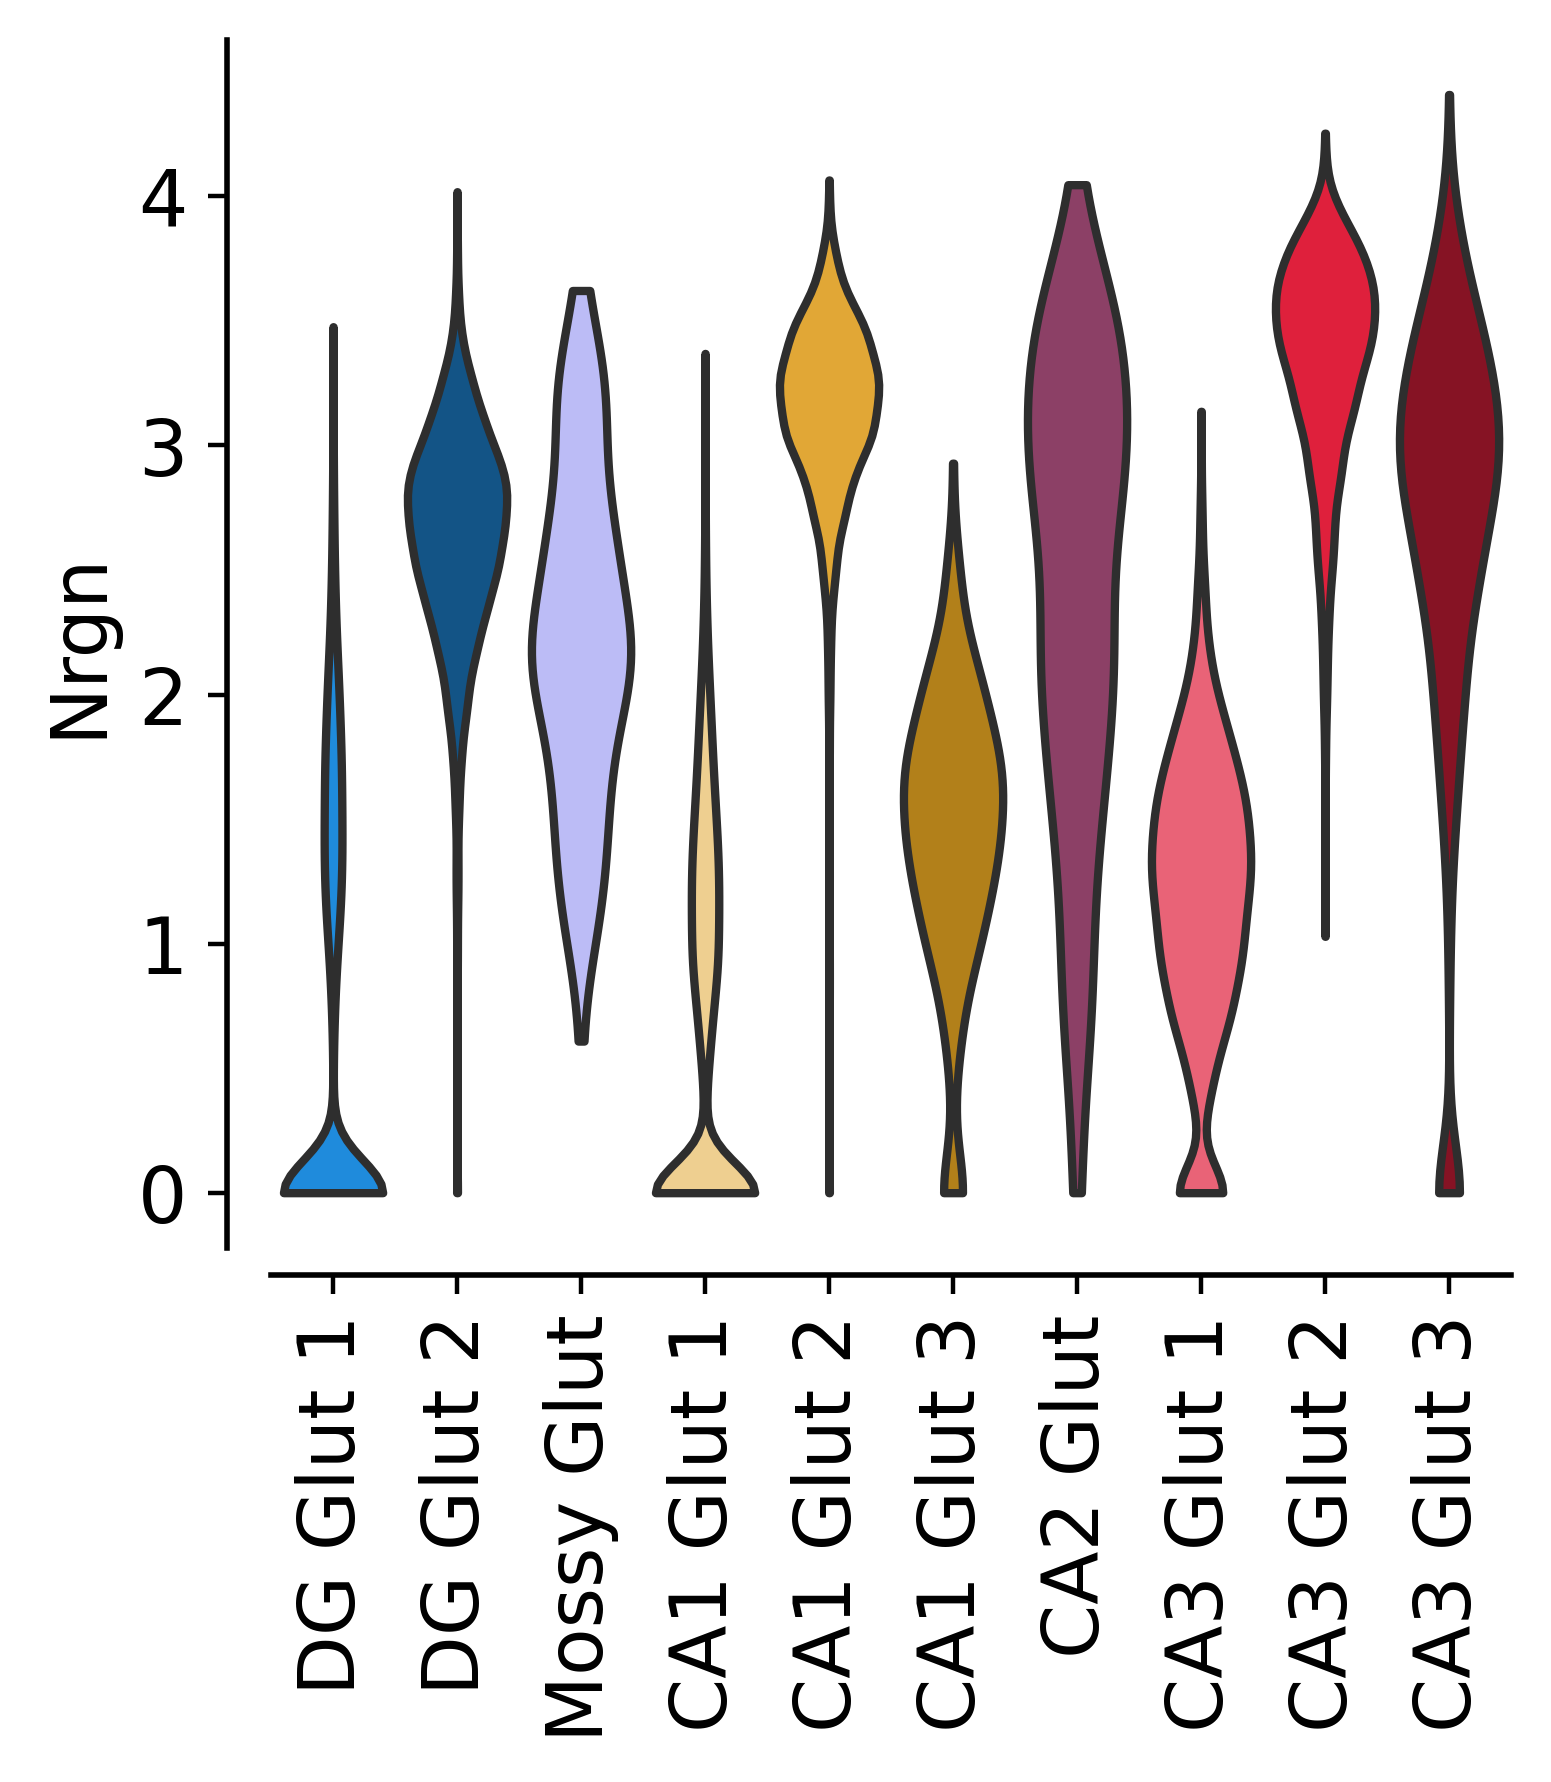

In [16]:
plt.rcParams['axes.titlesize'] = 14
plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['ytick.labelsize'] = 14
plt.rcParams['axes.labelsize'] = 14
fig, ax = plt.subplots(1, 1, figsize=(4, 4))
adata_plot = adata[adata.obs.louvain_coarse.str.contains('Glut', regex=True)]
sc.pl.violin(
    adata_plot,
    groupby='louvain_coarse',
    keys='Nrgn',
    rotation=90,
    ax=ax,
    show=False,
    stripplot=False,
    palette = adata_plot.uns['louvain_coarse_colors']
)

set_axis_style(ax)
ax.set_xticklabels(
    adata_plot.obs['louvain_coarse'].cat.categories,
    rotation=90
)
ax.set_ylabel('Nrgn')
#ax.set_title('Nrgn')

/app/python3/lib/python3.8/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):
/app/python3/lib/python3.8/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)


Text(0.5, 1.0, '')

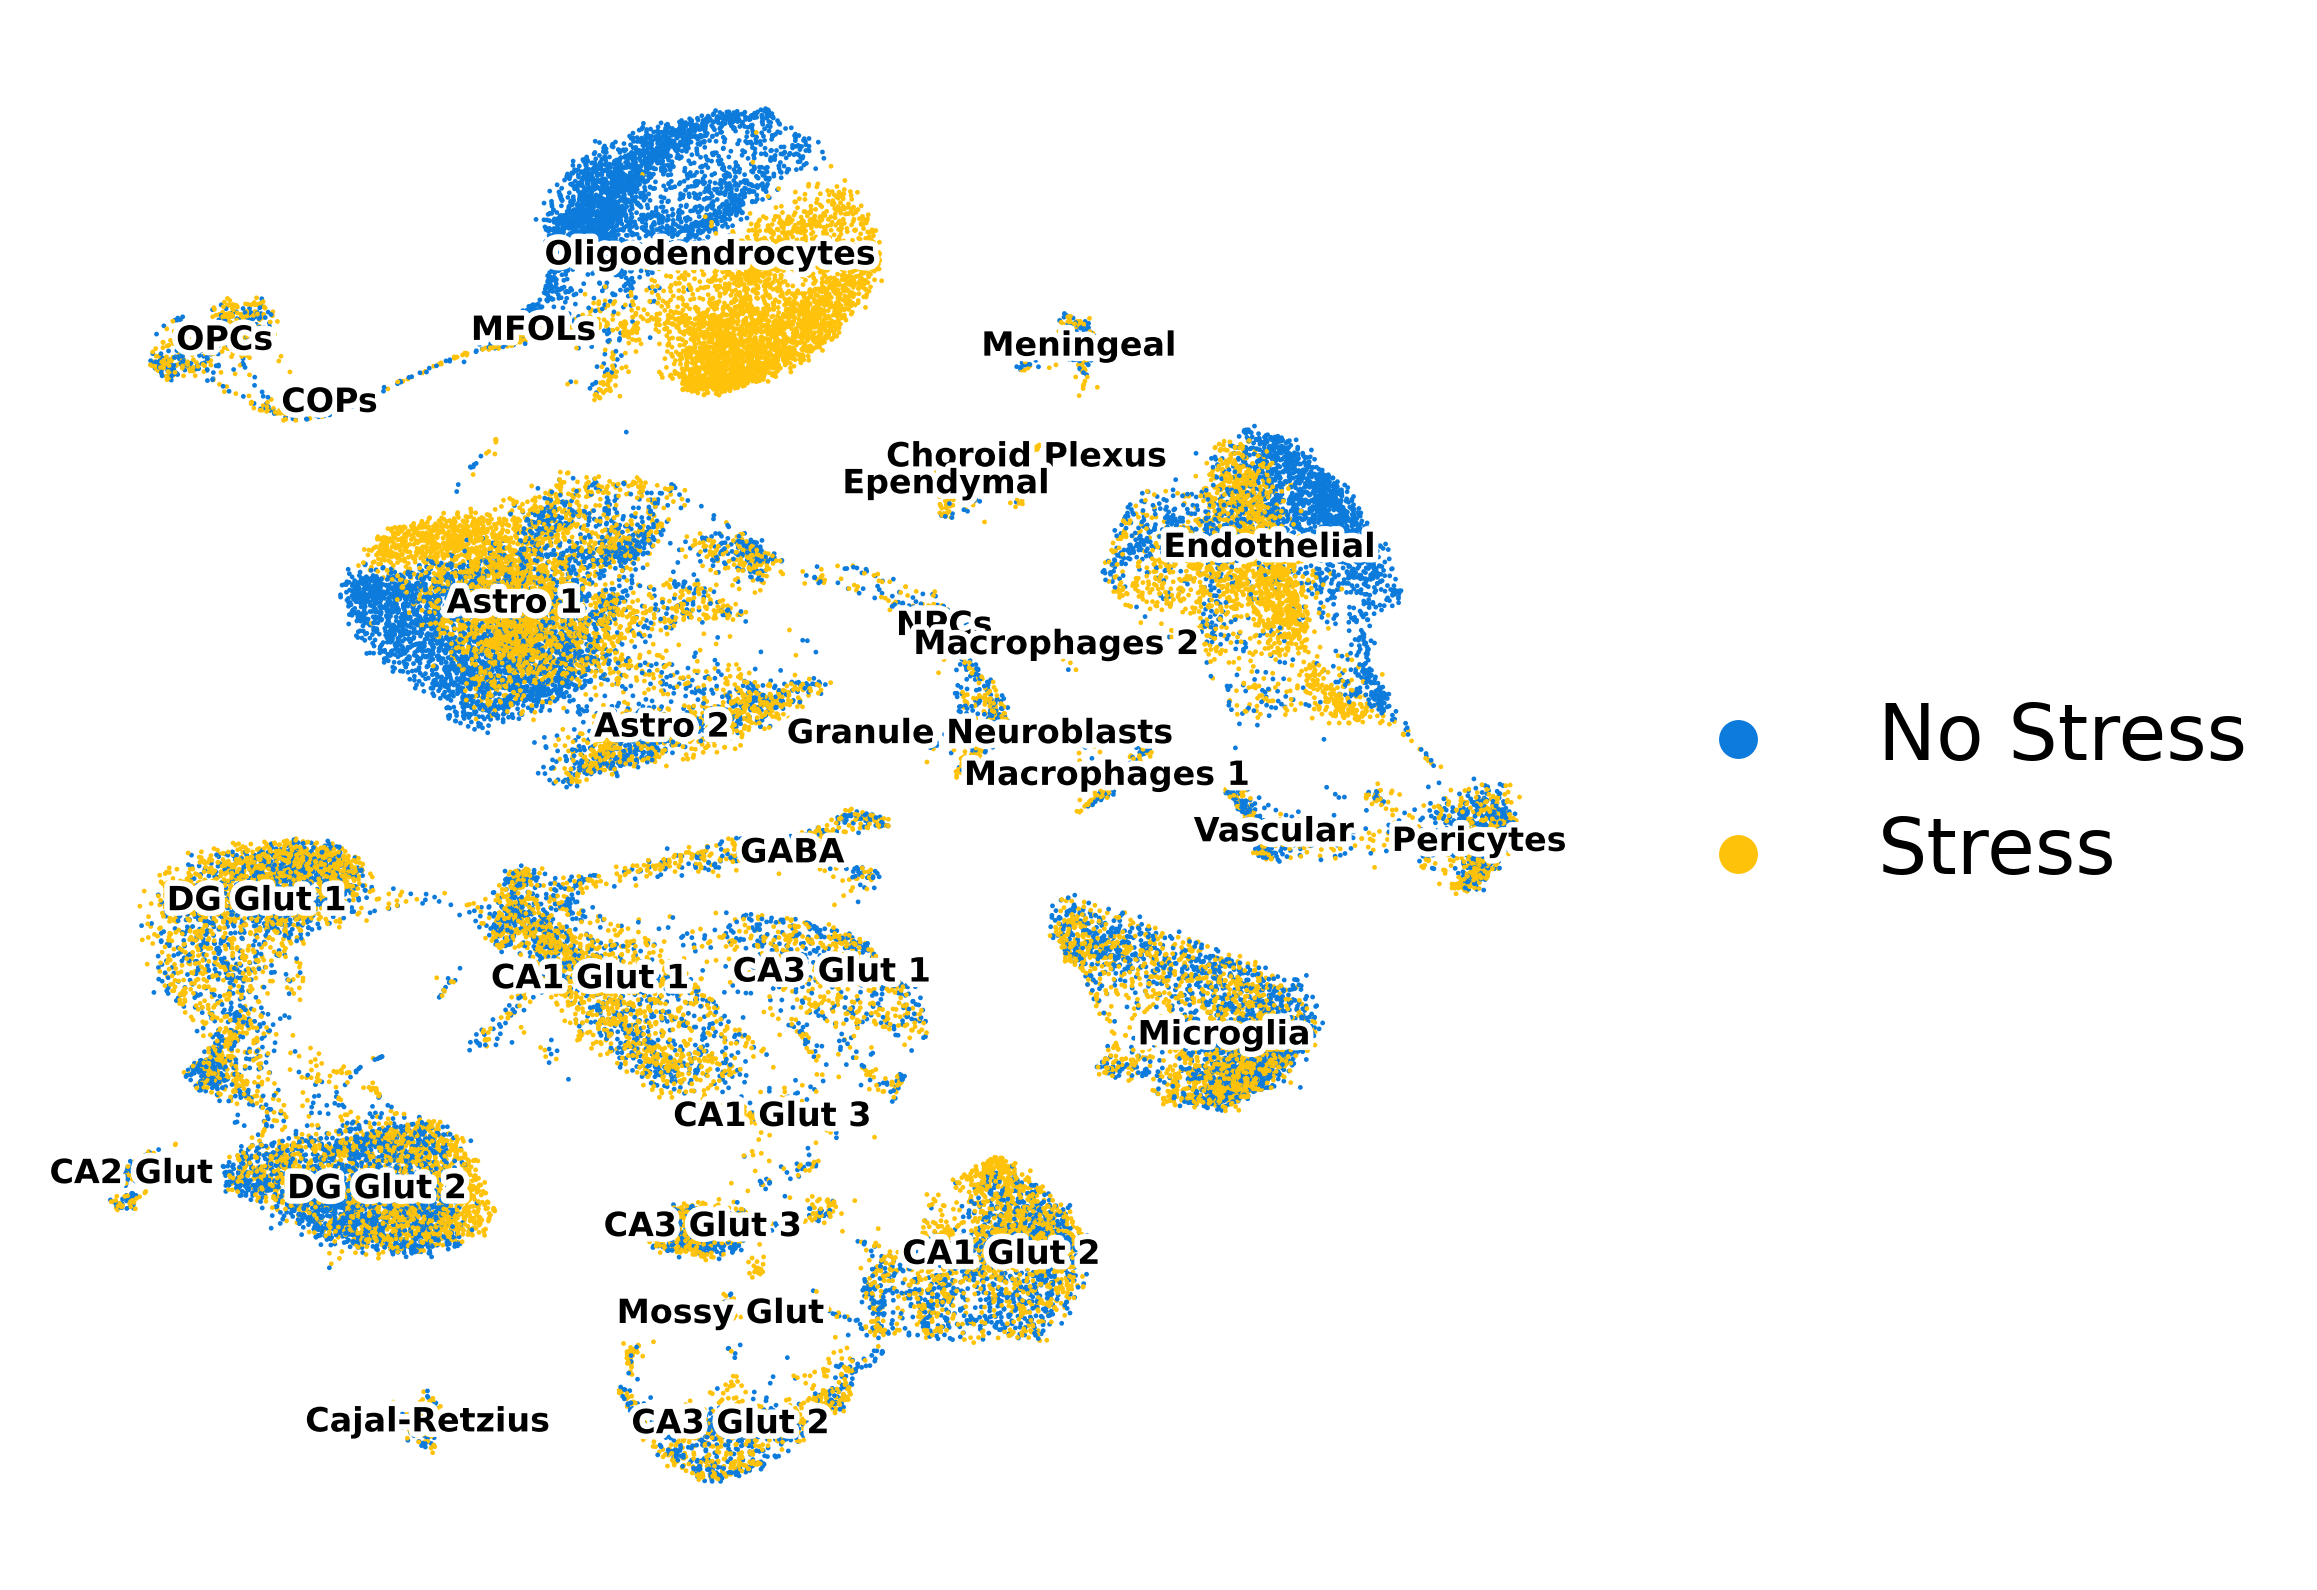

In [19]:
plt.rcParams['legend.fontsize'] = 14
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
adata = adata[adata.obs.comb.str.contains('Ctrl')]
sc.pl.umap(
    adata, 
    color='louvain_coarse',
    alpha=0,
    frameon=False, 
    legend_loc='on data',
    legend_fontoutline=2,
    legend_fontsize=6,
    ax=ax, 
    show=False, 
    #size=10,
)
sc.pl.umap(
    adata, 
    color='condition',
    frameon=False, 
    ax=ax, 
    show=False, 
    #size=10,
)
ax.set_title('')

Trying to set attribute `.obs` of view, copying.
<ipython-input-20-b9c108ad5278>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  adata_oligo_wt.obs['louvain_plot'][adata_oligo_wt.obs['louvain_plot']=='Oligodendrocytes'] = 'Oligodendrocytes (Ctrl)'
<ipython-input-20-b9c108ad5278>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  adata_oligo_wt.obs['louvain_plot'][adata_oligo_wt.obs['condition']=='Stress'] = 'Oligodendrocytes (Stress)'
/app/python3/lib/python3.8/site-packages/anndata/_core/anndata.py:1192: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype inste

Text(0.5, 1.0, 'Sgk1')

findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.


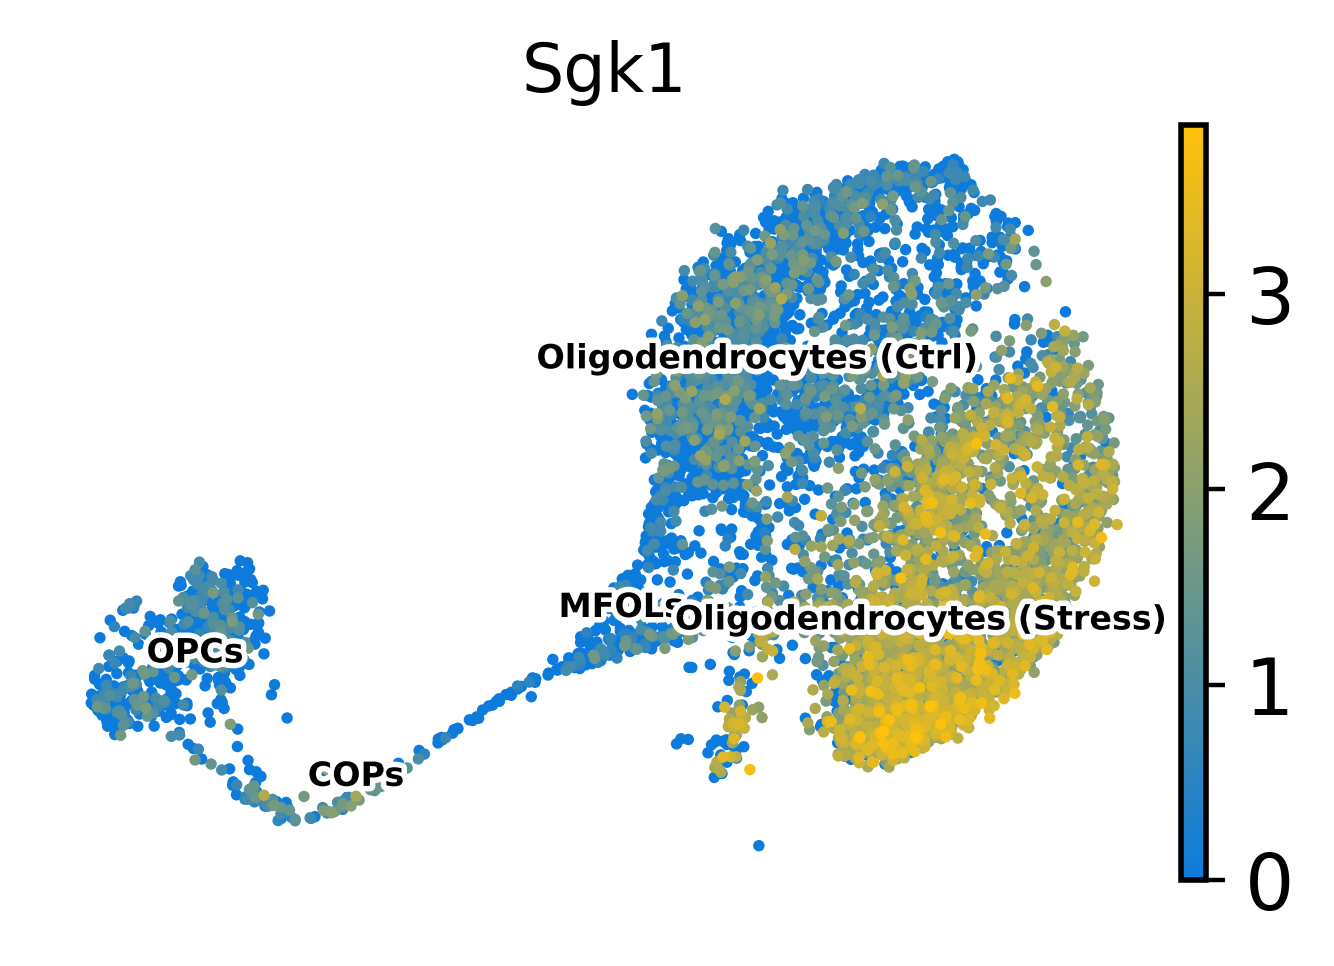

In [20]:
fig, ax = plt.subplots(1, 1, figsize=(4, 2.5))
cmap = mpl.colors.LinearSegmentedColormap.from_list("", ['#0C7bdc', '#ffc20a'])
adata_oligo_wt = adata[
    (adata.obs.louvain_coarse.str.contains('Oligo|OPC|COP|MFOL', regex=True))
    & (adata.obs.comb.str.contains('Ctrl'))
]
adata_oligo_wt.obs['louvain_plot'] = adata_oligo_wt.obs['louvain_coarse'].astype(str).copy()
adata_oligo_wt.obs['louvain_plot'][adata_oligo_wt.obs['louvain_plot']=='Oligodendrocytes'] = 'Oligodendrocytes (Ctrl)'
adata_oligo_wt.obs['louvain_plot'][adata_oligo_wt.obs['condition']=='Stress'] = 'Oligodendrocytes (Stress)'
sc.pl.umap(
    adata_oligo_wt, 
    color='louvain_plot',
    alpha=0,
    frameon=False, 
    legend_loc='on data',
    legend_fontoutline=2,
    legend_fontsize=6,
    ax=ax, 
    show=False, 
    #size=10,
)
sc.pl.umap(
    adata_oligo_wt,
    color='Sgk1',
    frameon=False, 
    ax=ax, 
    show=False, 
    #size=3,
    cmap=cmap
)
ax.set_title('Sgk1', fontsize=12)

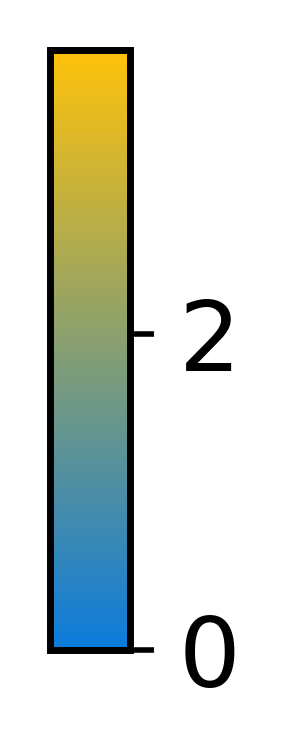

In [21]:
a = np.array([[0,3.8]])
plt.figure(figsize=(0.2, 2), dpi=500)
img = plt.imshow(a, cmap=cmap)
plt.gca().set_visible(False)
cax = plt.axes([0.1, 0.2, 0.8, 0.6])
plt.colorbar(orientation="vertical", cax=cax)

findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.


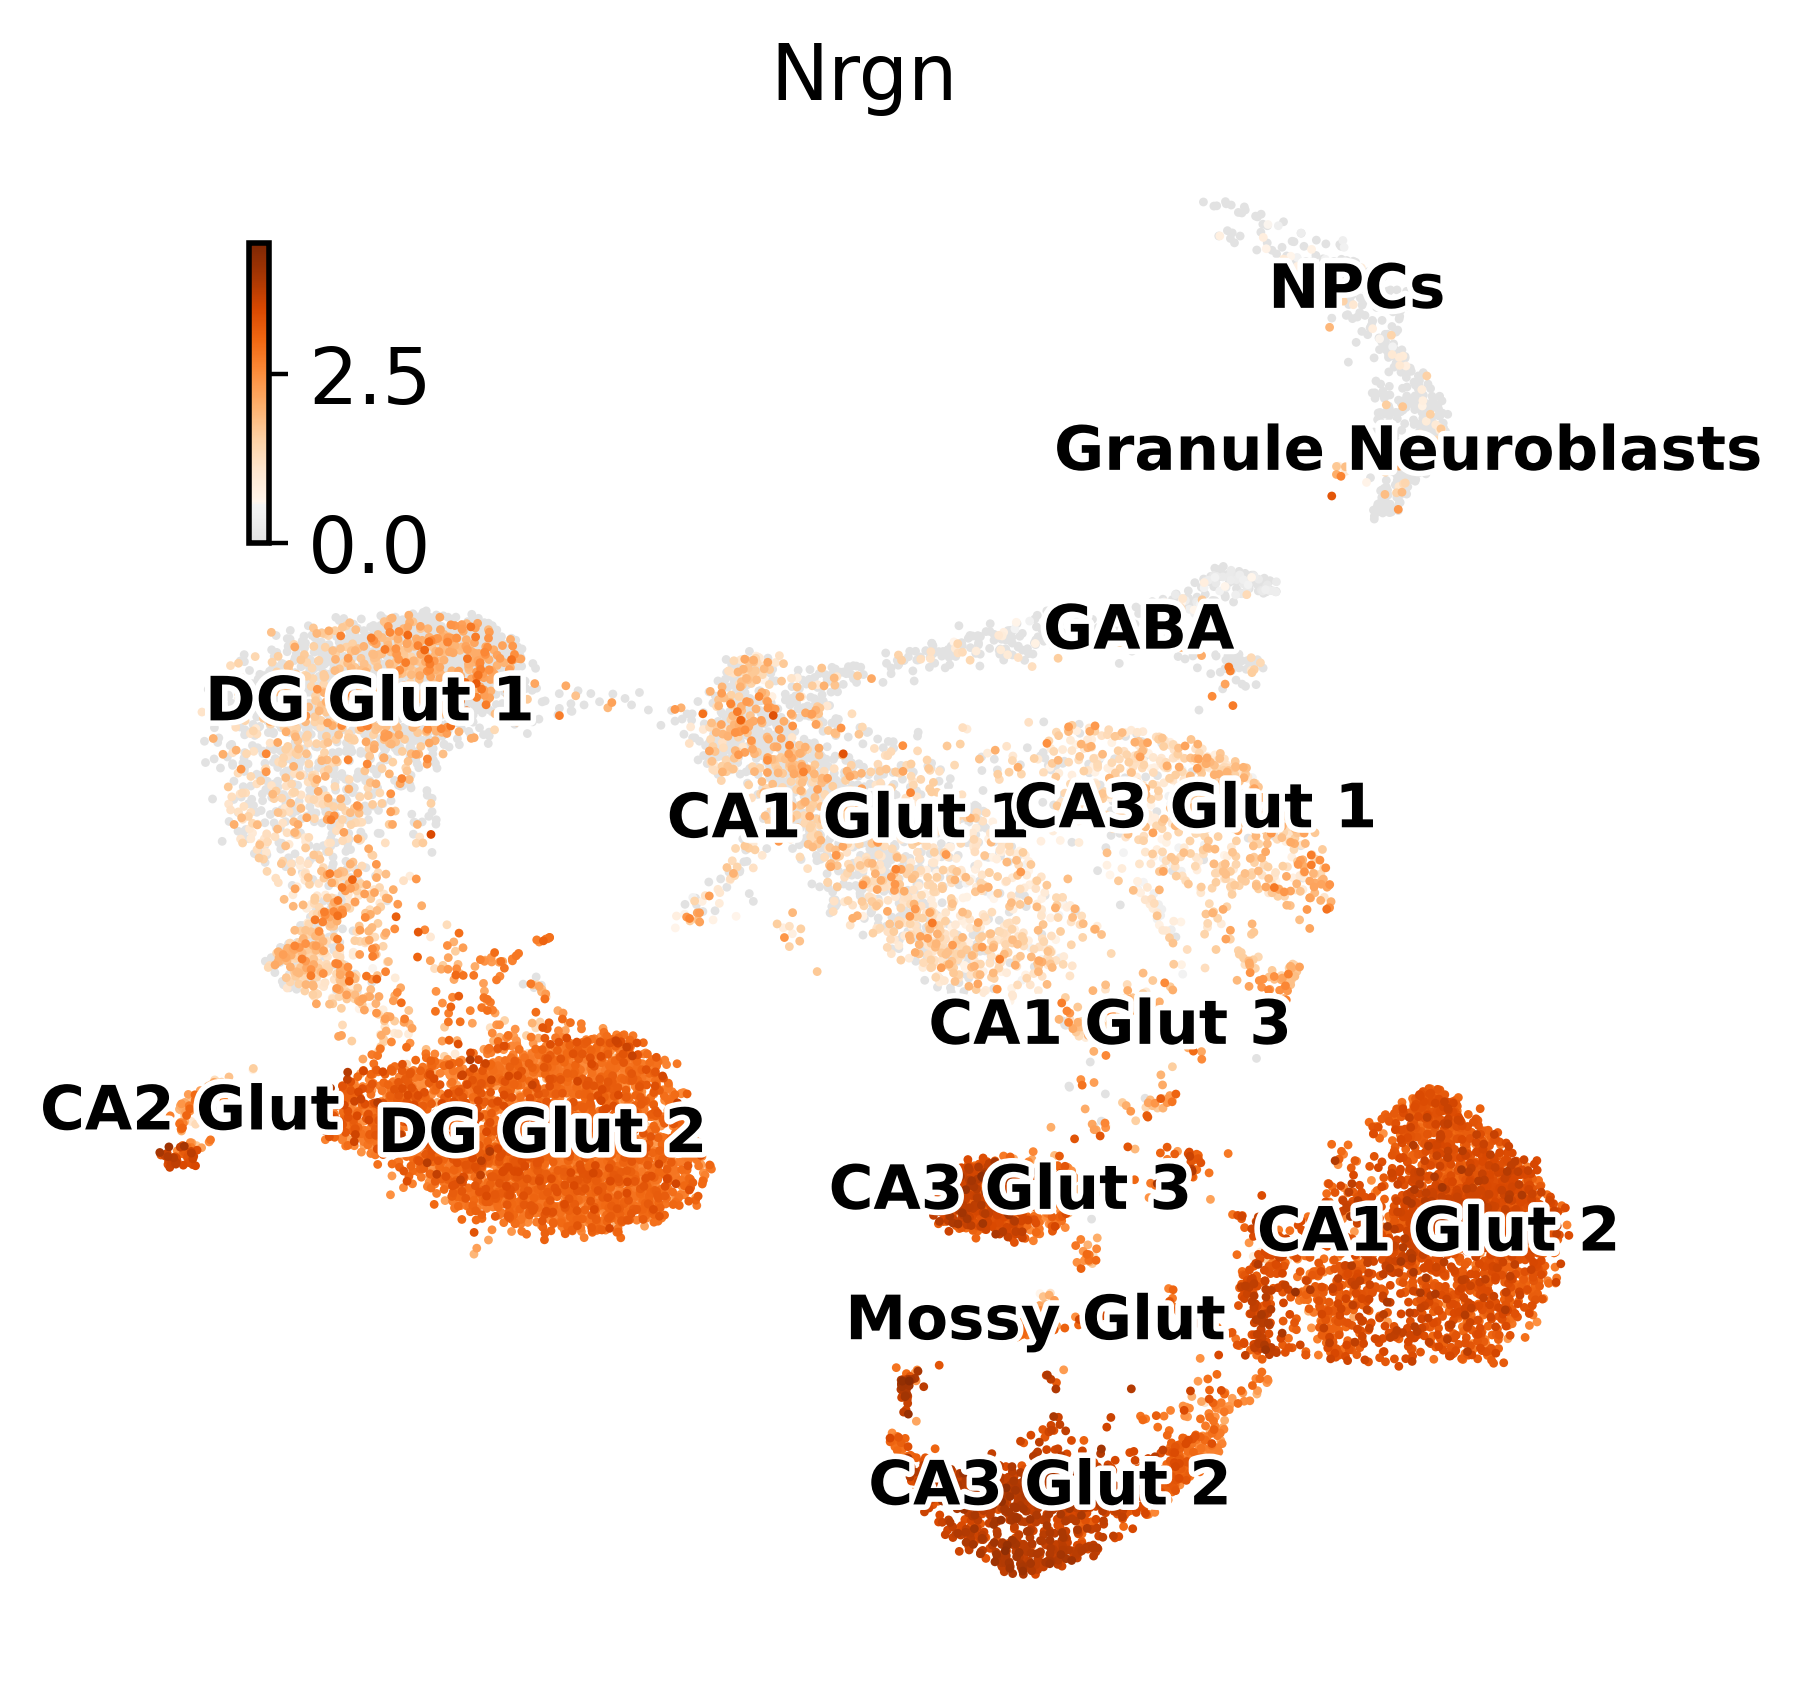

In [22]:
colors_ca1 = plt.cm.Oranges(np.linspace(0, 1, 128))
colors_grey = plt.cm.Greys_r(np.linspace(0.8,0.9,20))
colors_comb = np.vstack([colors_grey, colors_ca1])

mymap_list = mpl.colors.LinearSegmentedColormap.from_list('my_colormap', colors_comb)

adata_plot = adata[
    adata.obs.louvain_coarse.str.contains('CA|GABA|Glut|NPC|Neuro', regex=True)
]

fig, ax = plt.subplots(1, 1, figsize=(5, 5))
sc.pl.umap(
    adata_plot, 
    color='louvain_coarse',
    alpha=0,
    frameon=False, 
    legend_loc='on data',
    legend_fontoutline=2,
    legend_fontsize=11,
    ax=ax, 
    show=False, 
    #size=10,
)
gene = 'Nrgn'
col_vec = adata_plot.X[:, adata_plot.var_names==gene].squeeze()
order = np.argsort(col_vec)
p = ax.scatter(
    adata_plot.obsm['X_umap'][order, 0],
    adata_plot.obsm['X_umap'][order, 1],
    c=adata_plot.X[:, adata_plot.var_names==gene].squeeze()[order],
    cmap=mymap_list,
    marker='.',
    edgecolors='none',
    s=10,
    norm=col.Normalize(),
    rasterized=True
)
ax.axis('off')
ax.set_title(f'{gene}', fontsize=14)
pos1 = ax.get_position()
cbax = fig.add_axes([pos1.x0+0.08, pos1.y0+0.55, 0.01, 0.15])
cbar = plt.colorbar(p, cax=cbax)
cbar.ax.tick_params(labelsize=14)


In [23]:
adata.X[:, adata.var_names == 'Sgk1'].max()

ArrayView(4.30439882)

In [24]:
from matplotlib.ticker import MaxNLocator
def paired_plots(
    adata, 
    gene,
    adata_clust,
    qpcr_clust,
    genotype,
    ax1, 
    ax2,
    nrows,
    ncols,
    plot_idx,
    de_genes=None,
):
    adata_ = adata[adata.obs.louvain_coarse.str.contains(adata_clust)].copy()
    sc.pl.violin(
        adata_, 
        groupby='condition', 
        keys=gene,
        show=False,
        ax=ax1,
        stripplot=False,
        scale='width',
        linewidth=0.5,
    )
    if de_genes is not None:
        qval = float(
            de_genes[(de_genes.clust.str.contains(adata_clust)) & (de_genes.test=='WT')].set_index('gene').loc[gene]['qval']
        )
        log2fc = float(
            de_genes[(de_genes.clust.str.contains(adata_clust)) & (de_genes.test=='WT')].set_index('gene').loc[gene]['log2fc']
        )
        ax1.set_ylabel(f'$q={qval:.2f}$\ $Log2FC={log2fc:.2f}$', fontsize=6)
    else:
        ax1.set_ylabel(gene)
    
    x1, x2 = 0, 1 
    #scale = adata_.X[:, adata_.var_names == gene].max()
    scale = ax1.get_ylim()[1]
    y, h, col = scale, 0.15*scale, 'k'
    #ax2.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1, c=col)
    ax1.text(x2, 0.95*y, pval_to_asterisk(qval), fontsize=6, ha='center', va='bottom', color=col)
    
    ax1.set_xlabel('')
    ax1.set_ylabel('scRNA-seq', fontsize=8)
    ax1.set_ylim(bottom=0)
    #ax1.set_title(qpcr_clust)
    ax1.spines['right'].set_visible(False)
    ax1.spines['top'].set_visible(False)
    ax1.spines['left'].set_position(('outward', 2))
    ax1.spines['bottom'].set_position(('outward', 2))
    ax1.set_xticklabels(['Ctrl', 'Stress'], rotation=90)
    ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90)
    ax1.yaxis.set_major_locator(MaxNLocator(integer=True))
    sns.barplot(
        x='Condition', 
        y='Value', 
        data=valid_data[
            (valid_data['Gene']==gene) 
            & (valid_data['Cell Type']==qpcr_clust) 
            & (valid_data['Genotype']==genotype)
        ],
        palette=adata.uns['condition_colors'],
        ax=ax2,
        edgecolor='Black',
        linewidth=0.5,
    )
    sns.swarmplot(
        x='Condition', 
        y='Value', 
        data=valid_data[
            (valid_data['Gene']==gene) 
            & (valid_data['Cell Type']==qpcr_clust) 
            & (valid_data['Genotype']==genotype)
        ],
        size=3,
        palette=adata.uns['condition_colors'],
        alpha=0.8,
        edgecolor='gray',
        linewidth=0.5,
        ax=ax2
    )
    
    d = valid_data[
        (valid_data['Gene']==gene) 
        & (valid_data['Cell Type']==qpcr_clust) 
        & (valid_data['Genotype']==genotype)
    ]
    x = d[d['Condition'] == 'Ctrl']['Value']
    y = d[d['Condition'] == 'Stress']['Value']
    _, p = sp.stats.ttest_ind(x, y)


    x1, x2 = 0, 1 
    #scale = d['Value'].max()
    scale = ax2.get_ylim()[1]
    y, h, col = scale, 0.15*scale, 'k'
    #ax2.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1, c=col)
    ax2.text(x2, 0.95*y, pval_to_asterisk(p), fontsize=6, ha='center', va='bottom', color=col)
    
    ax2.set_xlabel('')
    ax2.set_ylabel('qPCR mRNA', fontsize=8)
    ax2.set_ylim(bottom=0)
    #ax2.set_title(qpcr_clust)
    ax2.spines['right'].set_visible(False)
    ax2.spines['top'].set_visible(False)
    ax2.spines['left'].set_position(('outward', 2))
    ax2.spines['bottom'].set_position(('outward', 2))
    ax2.set_xticklabels(['Ctrl', 'Stress'], rotation=90)
    ax_joint = fig.add_subplot(nrows, int(ncols/2), plot_idx, frameon=False)
    ax_joint.set_xticks([])
    ax_joint.set_yticks([])
    ax_joint.set_title(f'{gene} ({qpcr_clust})', fontsize=7)
    #ax_joint.set_title(f'{gene} ({qpcr_clust})\n $q={qval:.2f}$ $Log2FC={log2fc:.2f}$\n $p_{{qPCR}}={p:.2f}$', fontsize=7)
    #ax2.yaxis.set_major_locator(MaxNLocator(integer=True))

findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.
/app/python3/lib/python3.8/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):
/app/python3/lib/python3.8/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)
/app/python3/lib/python3.8/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):
/app/python3/lib/python3.8/site-packages/pandas/core/arrays/categorical.py

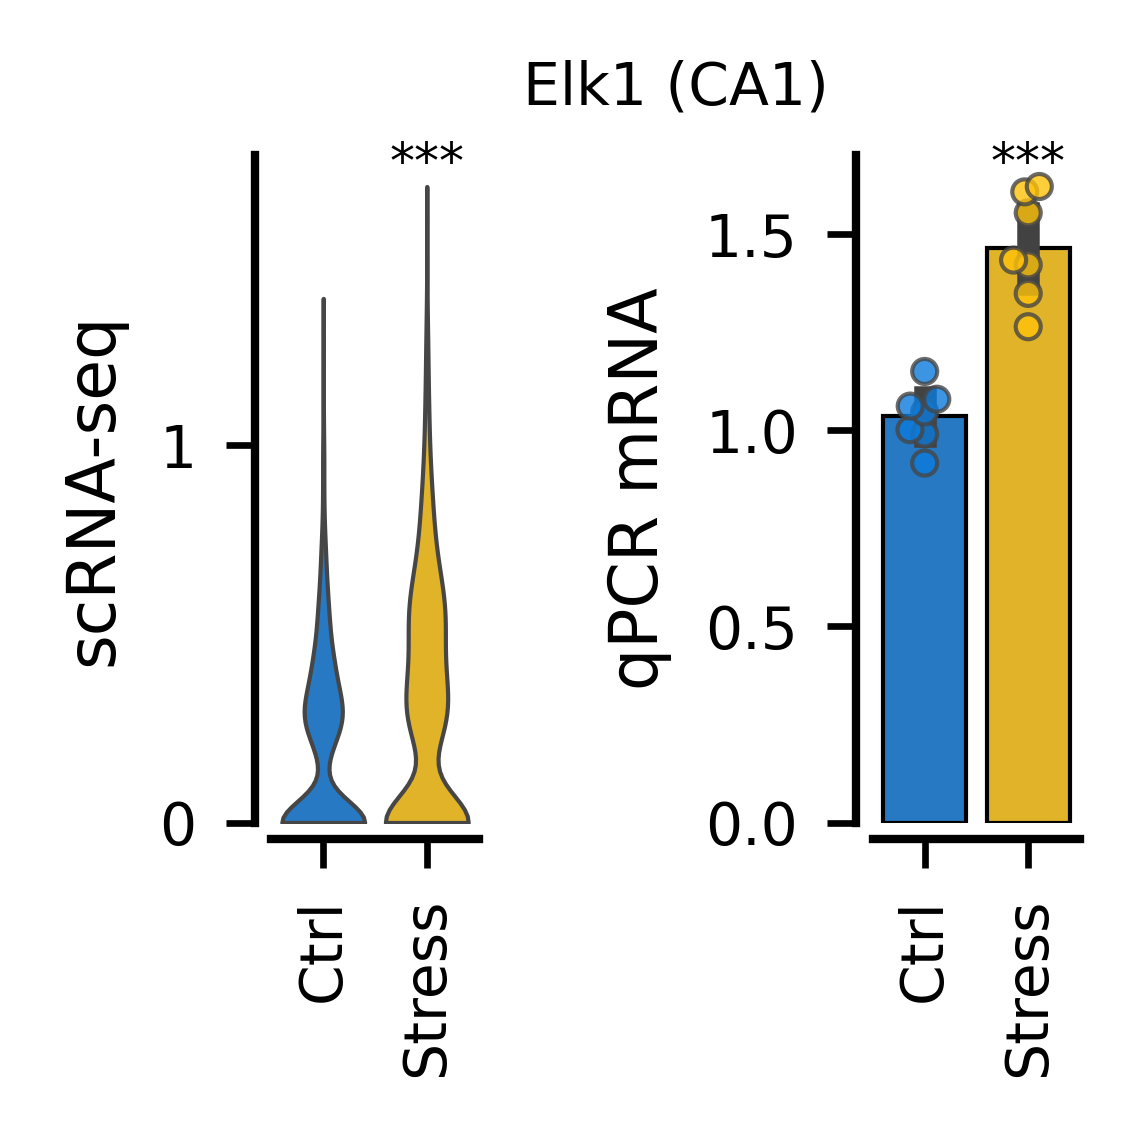

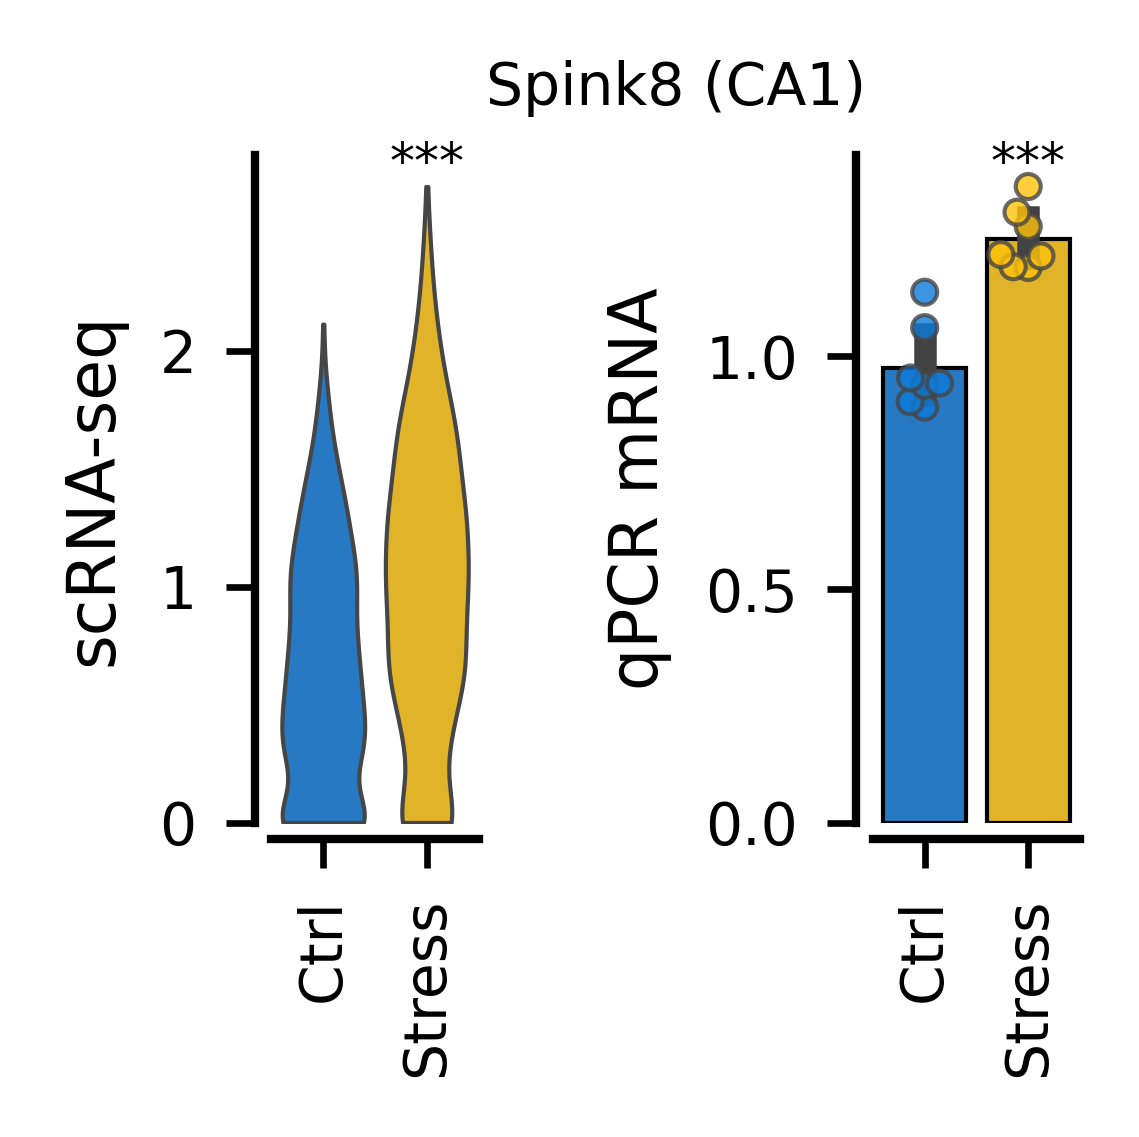

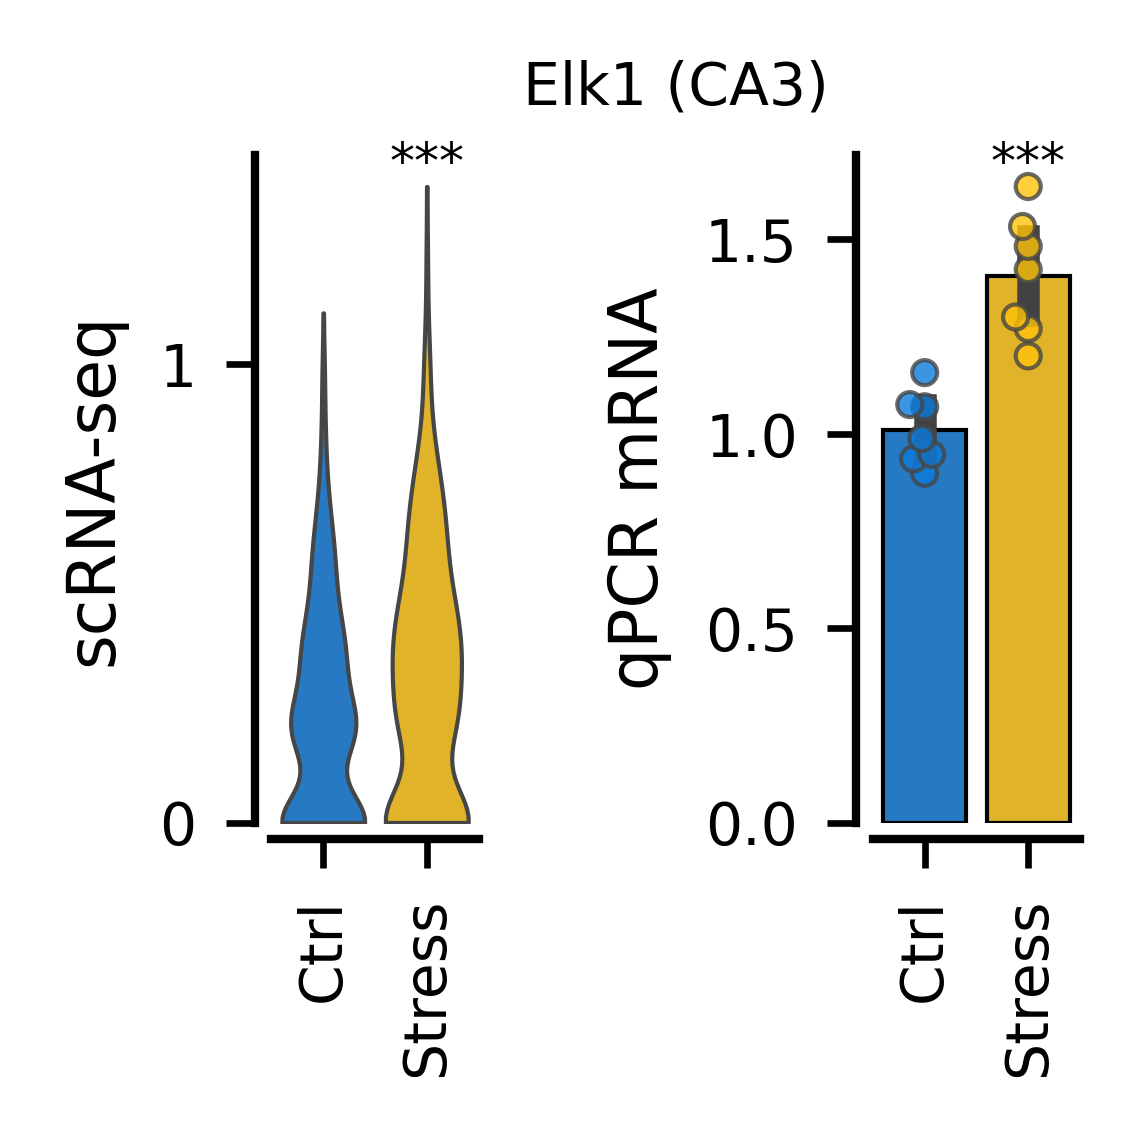

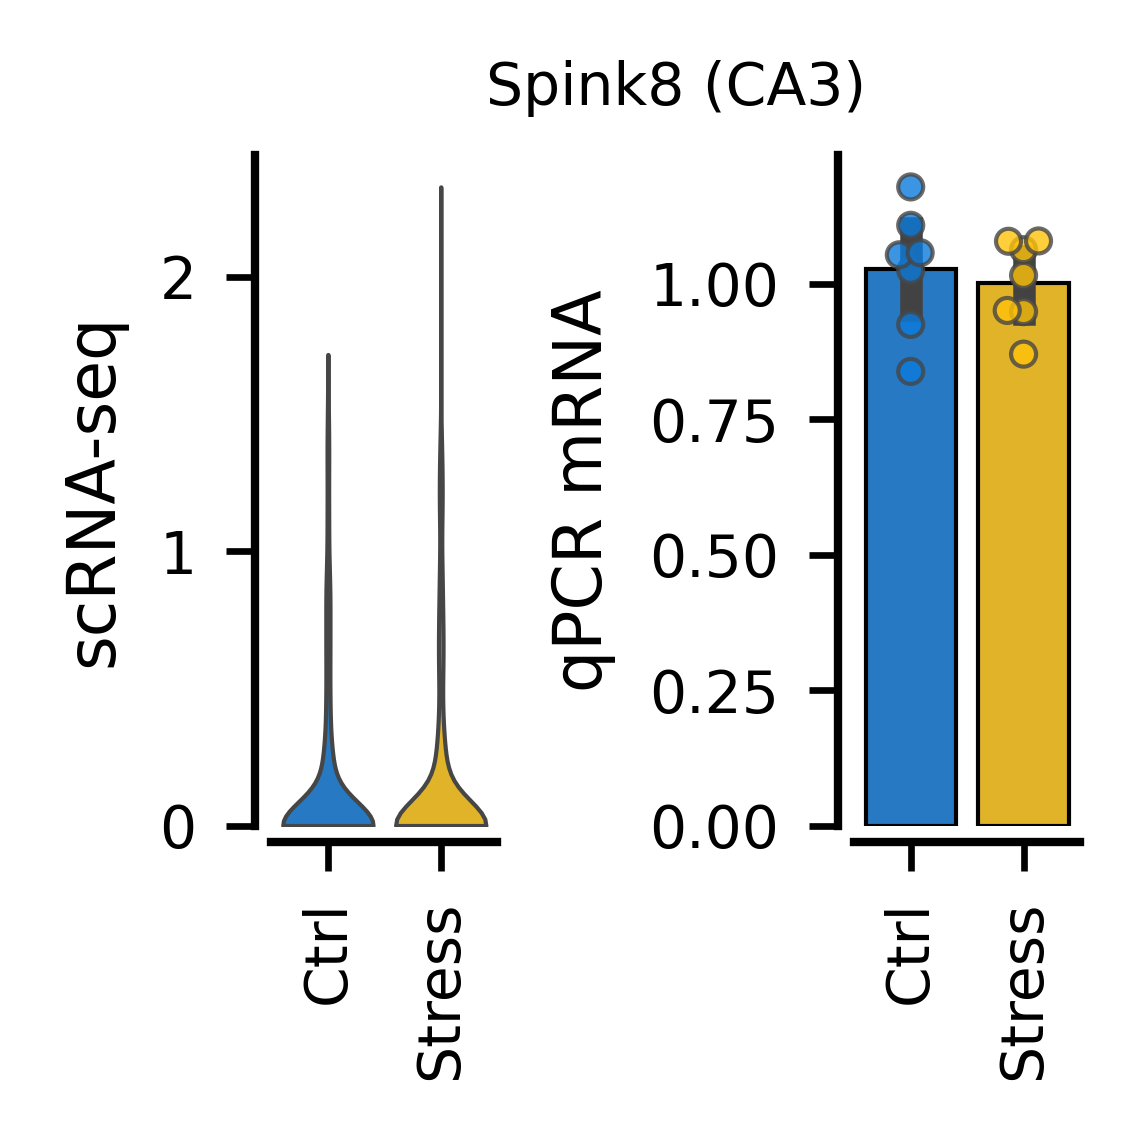

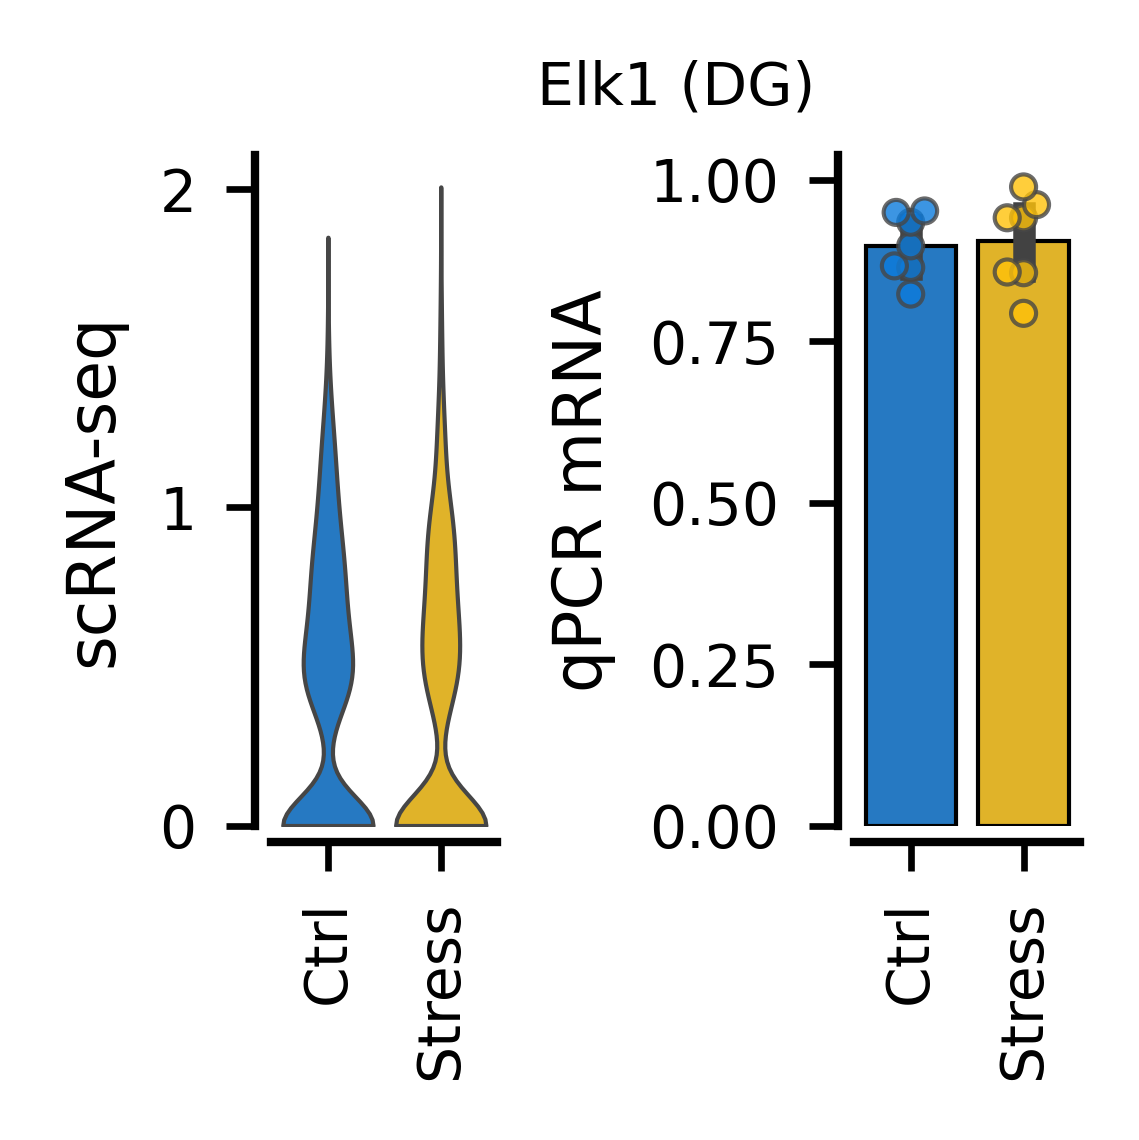

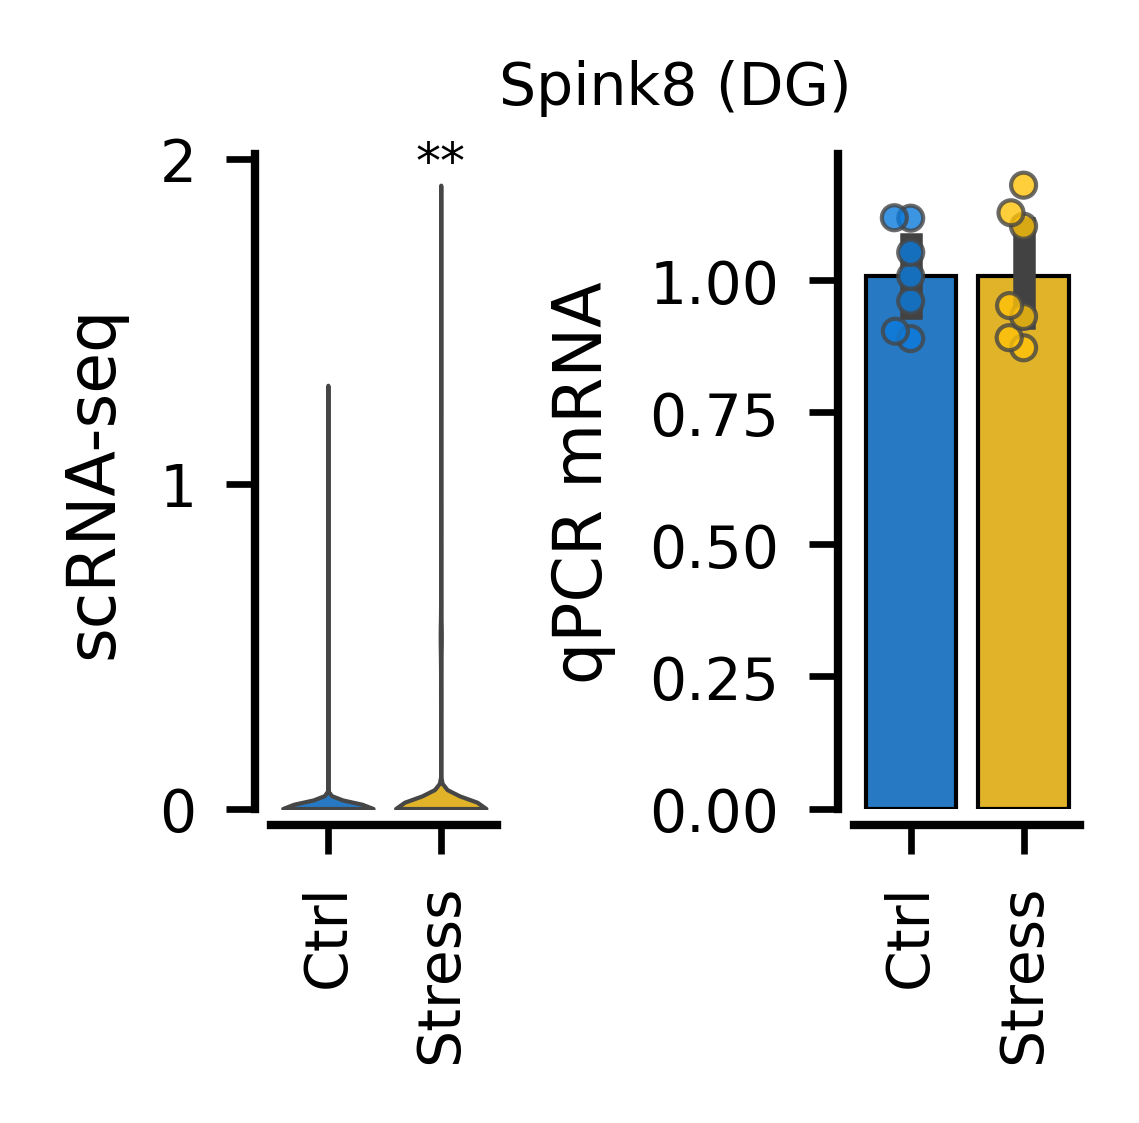

In [25]:
plt.rcParams['axes.labelsize'] = 7
plt.rcParams['xtick.labelsize'] = 7
plt.rcParams['ytick.labelsize'] = 7
plt.rcParams['legend.fontsize'] = 7
plt.rcParams['axes.titlesize'] = 8
plt.rcParams['axes.linewidth'] = 1
plt.rcParams['figure.dpi'] = 600
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Helvetica']

gene = ['Elk1', 'Spink8']*3
clust = ['CA1 Glut 2']*2 + ['CA3 Glut 2']*2 + ['DG Glut 2']*2
clust_name = ['CA1']*2 + ['CA3']*2 + ['DG']*2

for i in range(len(gene)):
    fig, ax = plt.subplots(1, 2, sharey=False, sharex=False, figsize=(2, 2))
    paired_plots(
        adata, 
        gene[i], 
        clust[i], 
        clust_name[i], 
        'WT', 
        ax[0],
        ax[1],
        nrows=1,
        ncols=2,
        plot_idx=1,
        de_genes=de_genes
    )
    fig.tight_layout()

/app/python3/lib/python3.8/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):
/app/python3/lib/python3.8/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)
/app/python3/lib/python3.8/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):
/app/python3/lib/python3.8/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)
/app/python3/lib/python3.8/site-pack

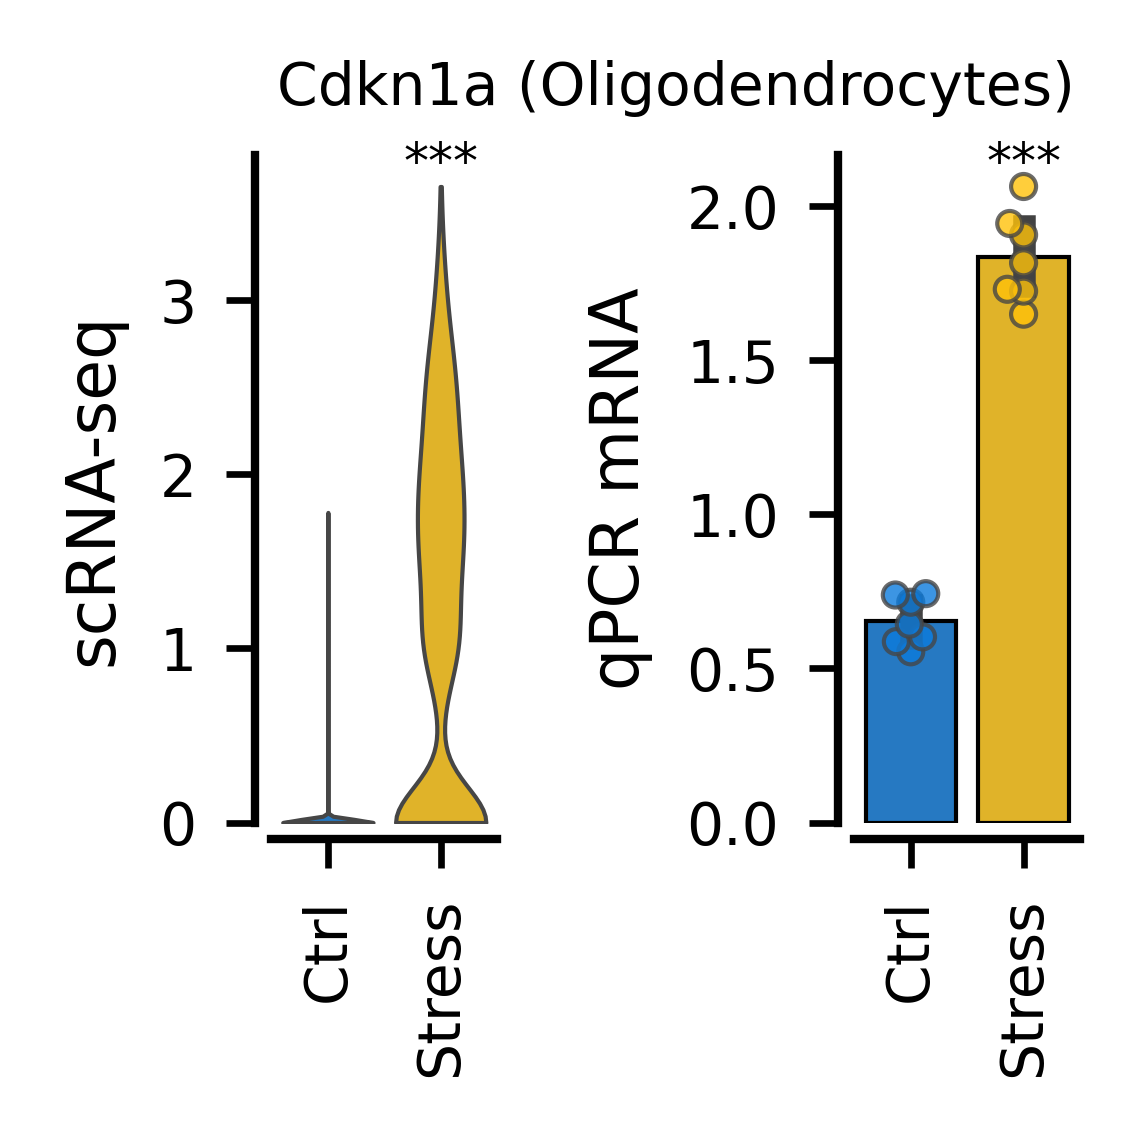

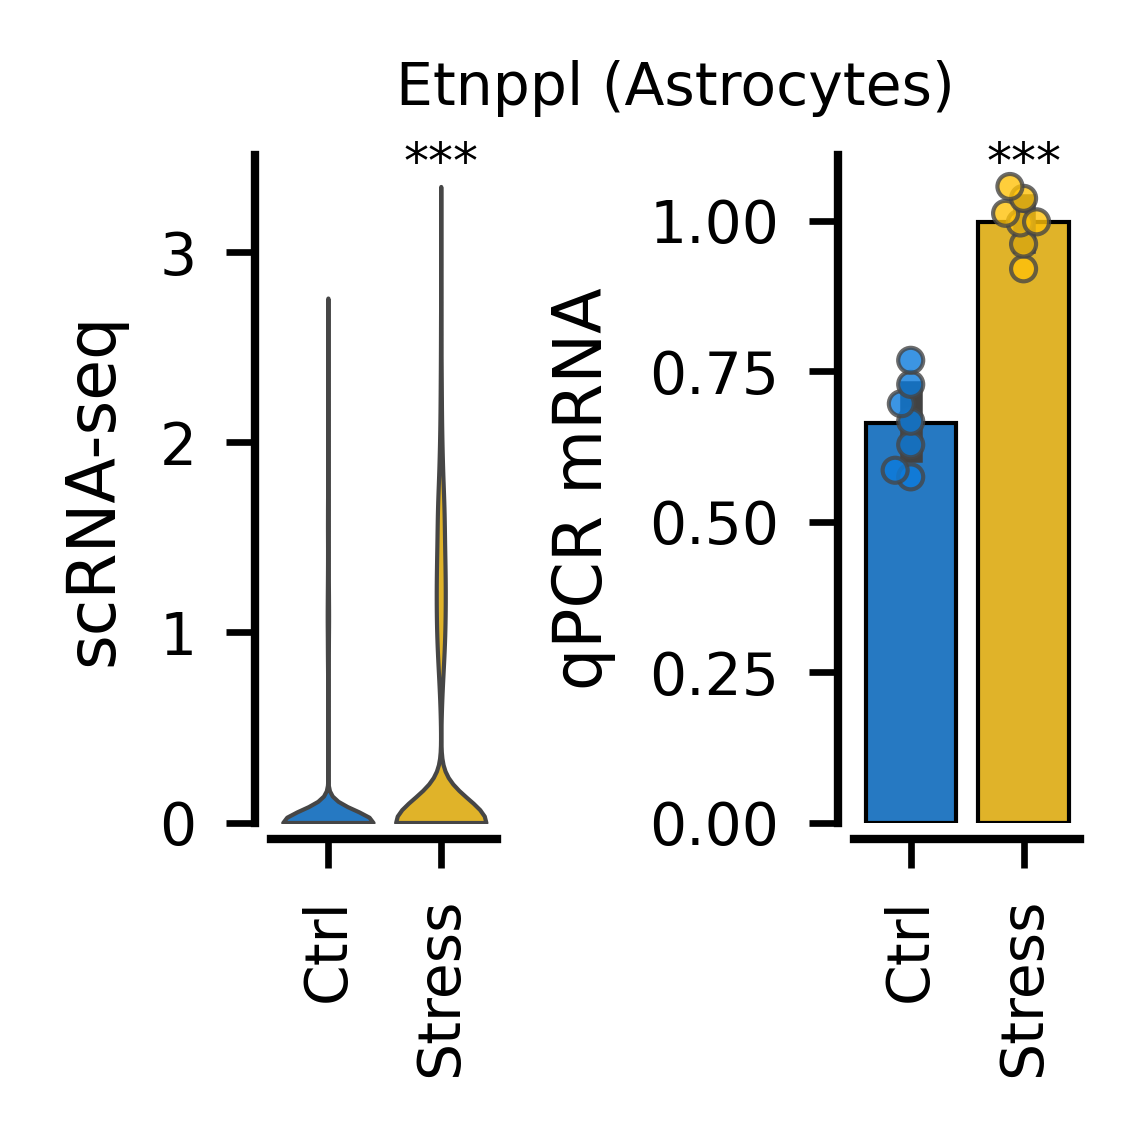

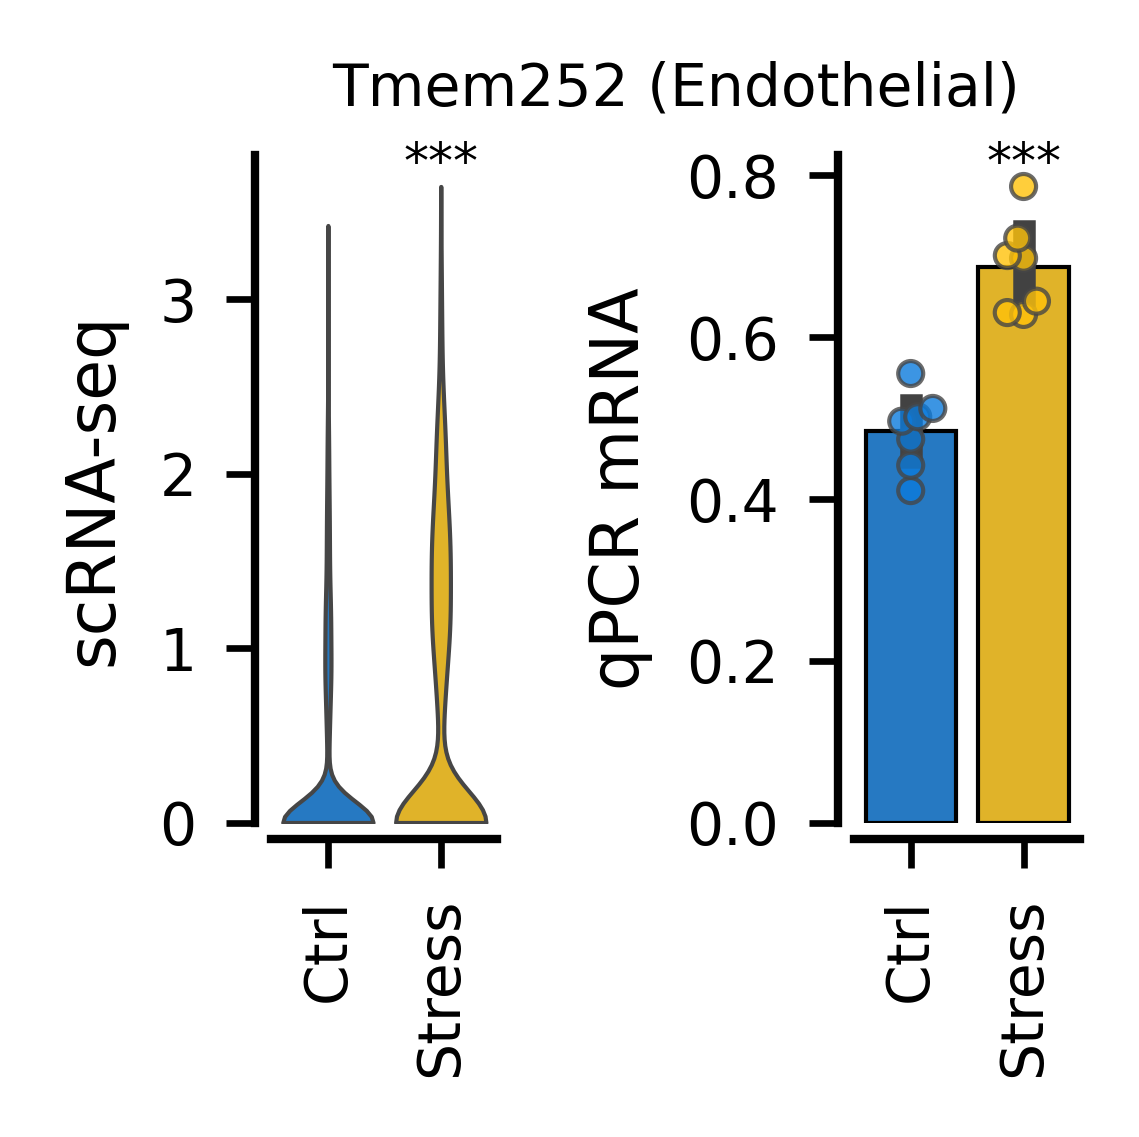

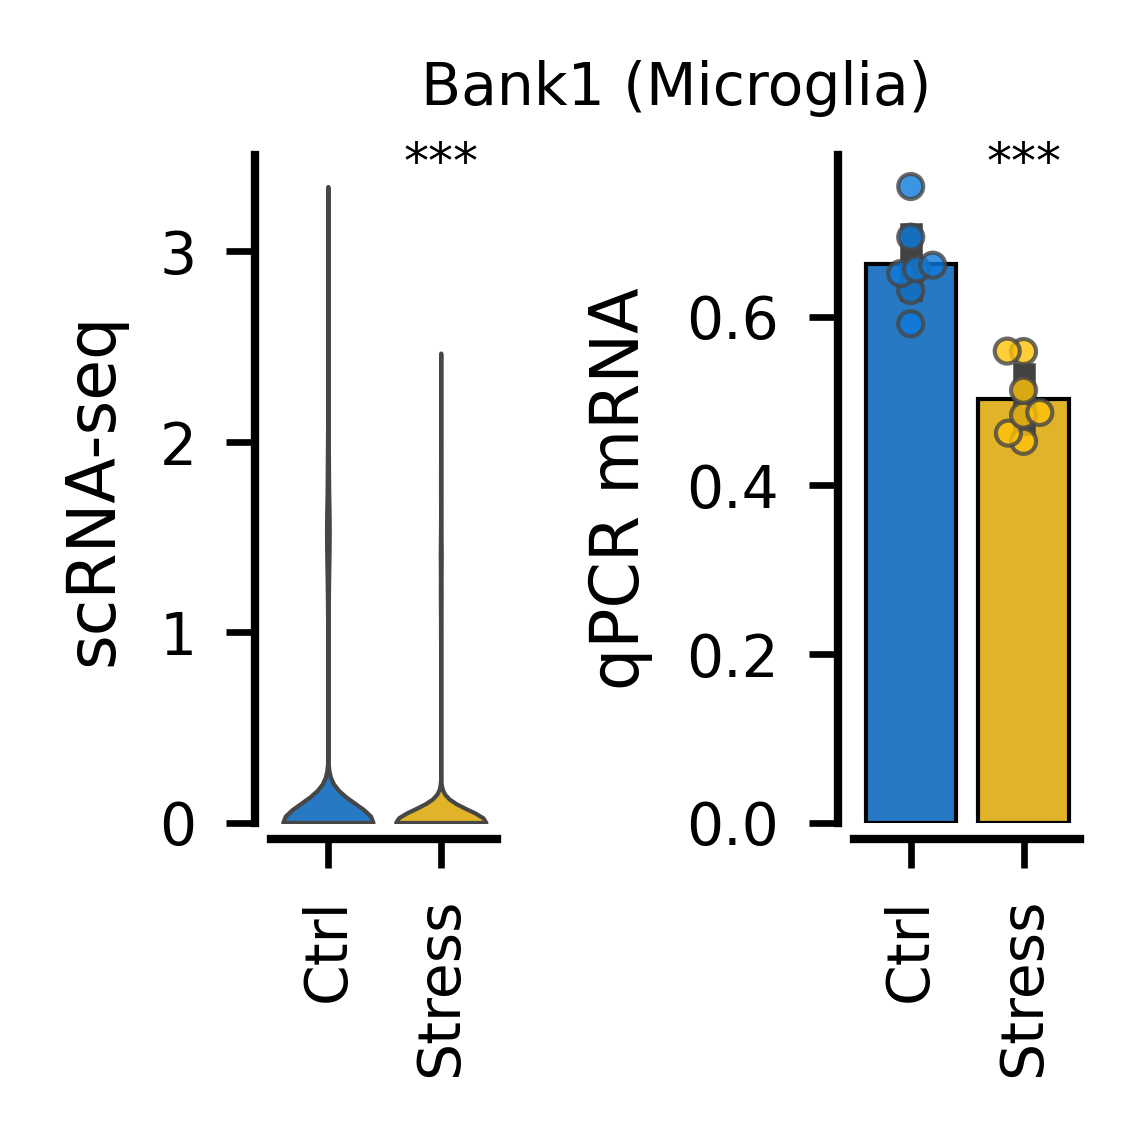

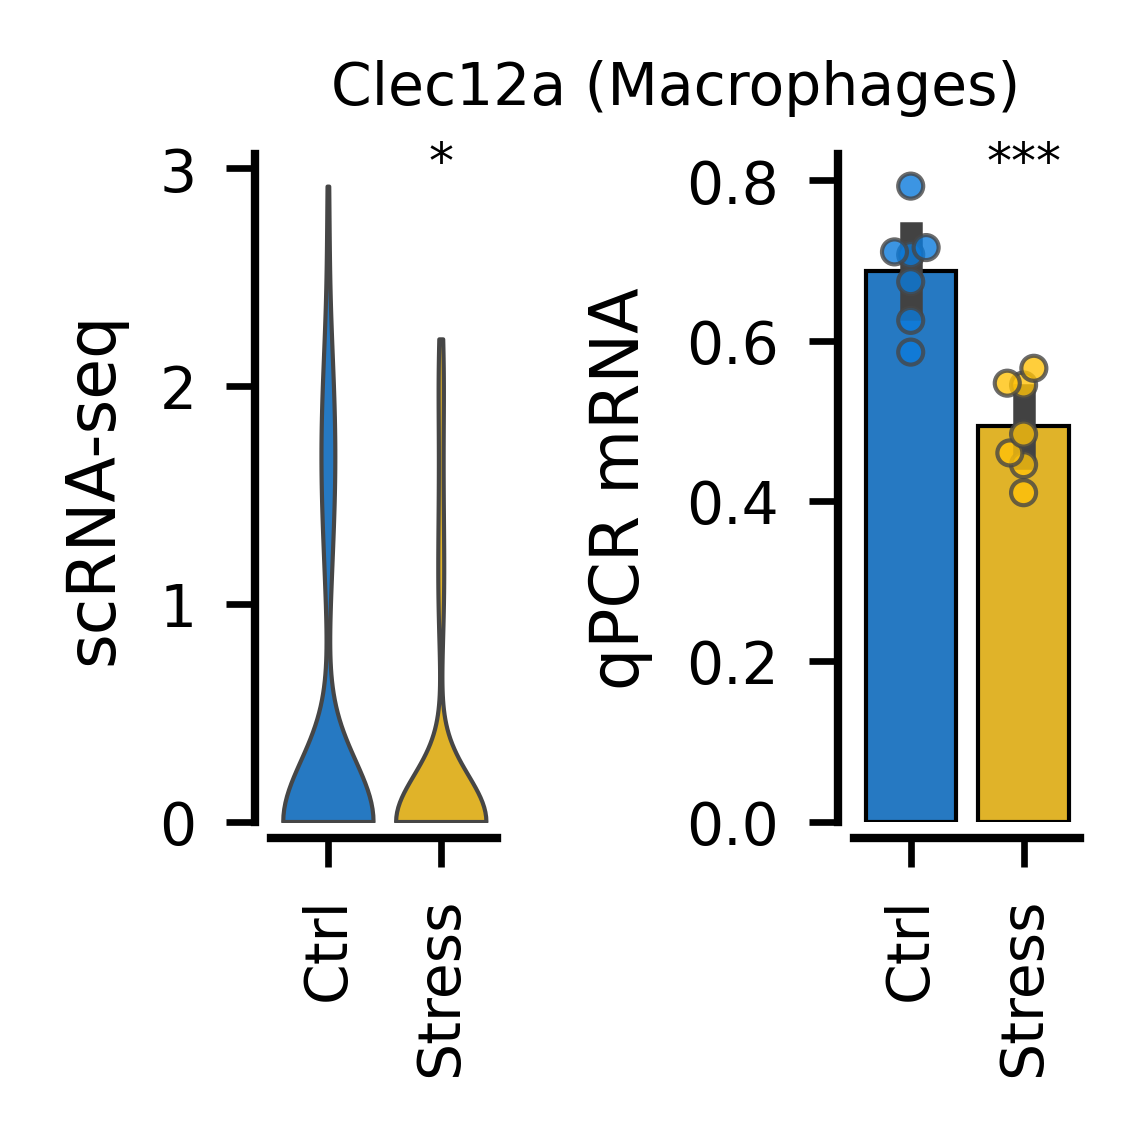

In [26]:
plt.rcParams['axes.labelsize'] = 7
plt.rcParams['xtick.labelsize'] = 7
plt.rcParams['ytick.labelsize'] = 7
plt.rcParams['legend.fontsize'] = 7
plt.rcParams['axes.titlesize'] = 8
plt.rcParams['axes.linewidth'] = 1
plt.rcParams['figure.dpi'] = 600
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Helvetica']

gene = ['Cdkn1a', 'Etnppl', 'Tmem252', "Bank1", "Clec12a"]
clust = ['Oligodendrocytes', 'Astro 1', 'Endothelial', 'Microglia', 'Macrophages 1']
clust_name = ['Oligodendrocytes', 'Astrocytes', 'Endothelial', 'Microglia', 'Macrophages']

for i in range(len(gene)):
    fig, ax = plt.subplots(1, 2, sharey=False, sharex=False, figsize=(2, 2))
    paired_plots(
        adata, 
        gene[i], 
        clust[i], 
        clust_name[i], 
        'WT', 
        ax[0],
        ax[1],
        nrows=1,
        ncols=2,
        plot_idx=1,
        de_genes=de_genes
    )
    fig.tight_layout()

/app/python3/lib/python3.8/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):
/app/python3/lib/python3.8/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)


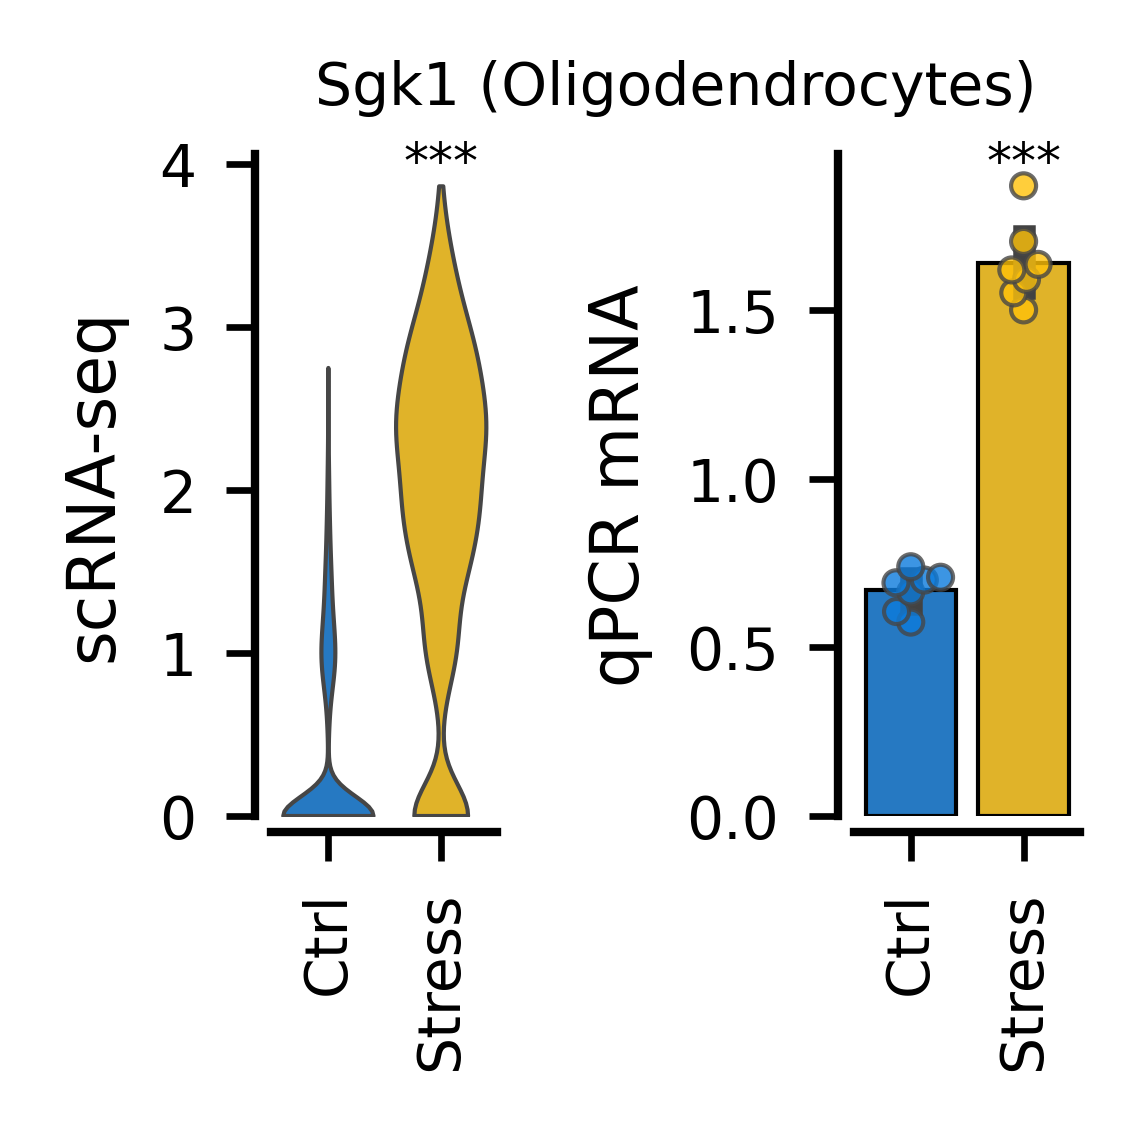

In [27]:
plt.rcParams['axes.labelsize'] = 7
plt.rcParams['xtick.labelsize'] = 7
plt.rcParams['ytick.labelsize'] = 7
plt.rcParams['legend.fontsize'] = 7
plt.rcParams['axes.titlesize'] = 8
plt.rcParams['axes.linewidth'] = 1
plt.rcParams['figure.dpi'] = 600
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Helvetica']

gene = ['Sgk1']
clust = ['Oligodendrocytes']
clust_name = ['Oligodendrocytes']

for i in range(len(gene)):
    fig, ax = plt.subplots(1, 2, sharey=False, sharex=False, figsize=(2, 2))
    paired_plots(
        adata, 
        gene[i], 
        clust[i], 
        clust_name[i], 
        'WT', 
        ax[0],
        ax[1],
        nrows=1,
        ncols=2,
        plot_idx=1,
        de_genes=de_genes
    )
    fig.tight_layout()

<ipython-input-30-078004285d5a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rnascope['Oligo']['Condition'][rnascope['Oligo']['Condition'] == 'AD'] = 'Stress'
/app/python3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 50.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


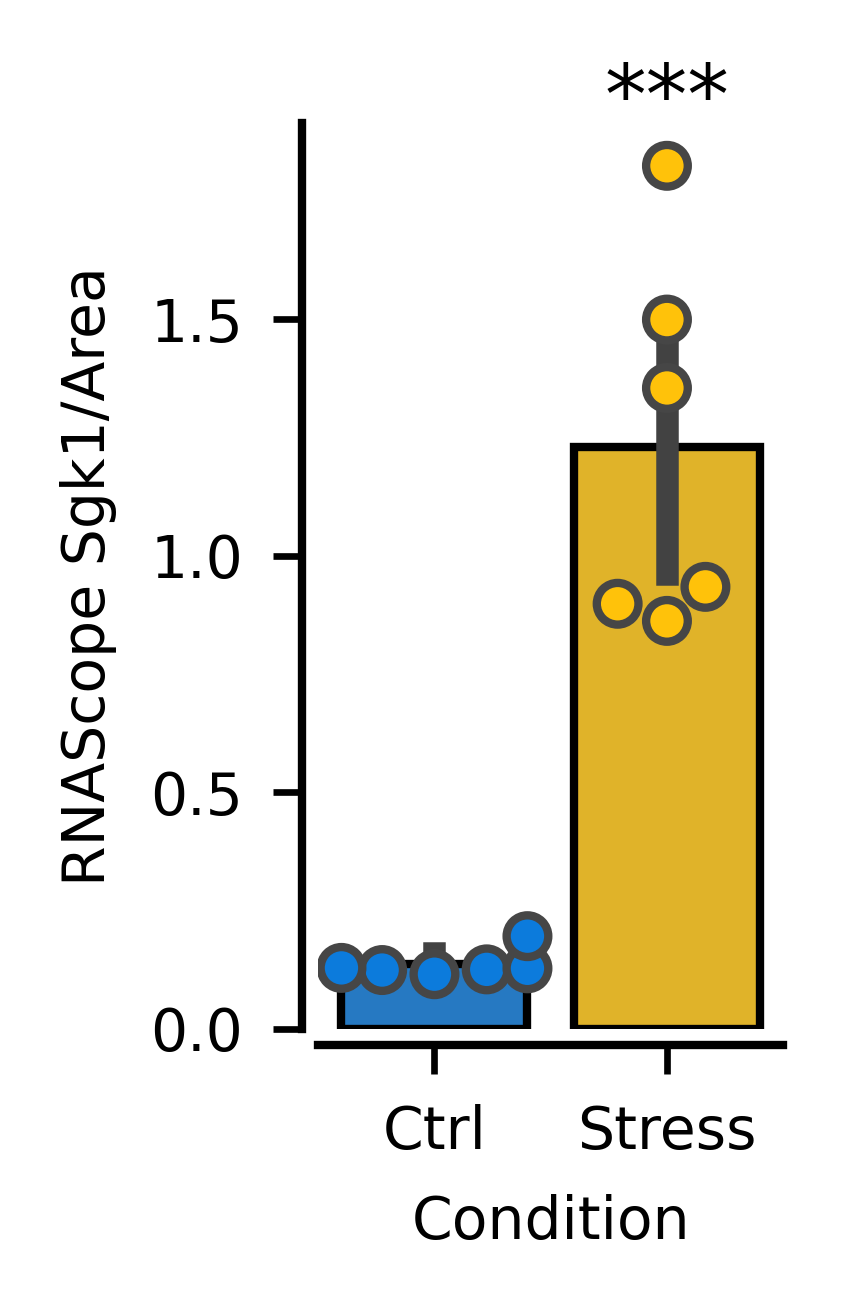

In [30]:
fig, ax = plt.subplots(1, 1, figsize=(1, 2)) 
rnascope['Oligo']['Condition'][rnascope['Oligo']['Condition'] == 'AD'] = 'Stress'
sns.barplot(
    x='Condition',
    y='Sgk1/Area', 
    data=rnascope['Oligo'],
    edgecolor='Black',
    linewidth=1,
    ax=ax,
    palette=adata.uns['condition_colors']
)
sns.swarmplot(
    x='Condition',
    y='Sgk1/Area', 
    data=rnascope['Oligo'],
    edgecolor='gray', 
    linewidth=1, 
    ax=ax,
    palette=adata.uns['condition_colors']
)

ax.set_ylabel('RNAScope Sgk1/Area')
x = rnascope['Oligo'][rnascope['Oligo']['Condition'] == 'Ctrl']['Sgk1/Area']
y = rnascope['Oligo'][rnascope['Oligo']['Condition'] == 'Stress']['Sgk1/Area']
_, p = sp.stats.ttest_ind(x, y)


x1, x2 = 0, 1 
#y, h, col = rnascope['Oligo']['Sgk1/Area'].max()+0.2, 0.2, 'k'
y = ax.get_ylim()[1]
#ax.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1, c=col)
ax.text(x2, 0.98*y, pval_to_asterisk(p), ha='center', va='bottom', color='k')
sns.despine(offset=2)

/app/python3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 14.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


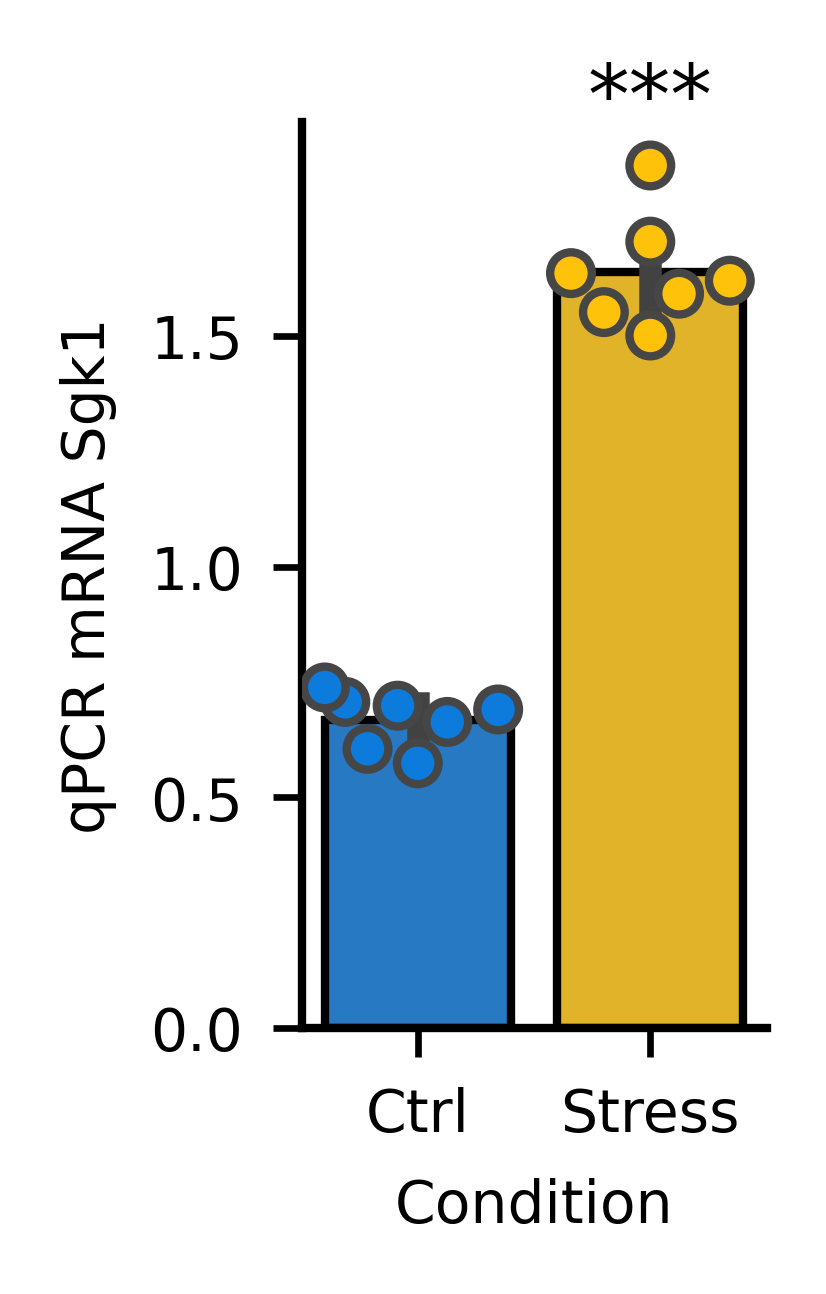

In [31]:
fig, ax = plt.subplots(1, 1, figsize=(1, 2)) 
df = valid_data[
    (valid_data['Gene']=='Sgk1') 
    & (valid_data['Cell Type'].str.contains('Oligo')) 
    & (valid_data['Genotype']=='WT')
]
sns.barplot(
    x='Condition',
    y='Value',
    data=df,
    edgecolor='Black',
    linewidth=1,
    ax=ax,
    palette=adata.uns['condition_colors']
)
sns.swarmplot(
    x='Condition',
    y='Value',
    data=df,
    edgecolor='gray', 
    linewidth=1, 
    ax=ax,
    palette=adata.uns['condition_colors']
)
ax.set_ylabel('qPCR mRNA Sgk1')
x = df[df['Condition'] == 'Ctrl']['Value']
y = df[df['Condition'] == 'Stress']['Value']
_, p = sp.stats.ttest_ind(x, y)

x1, x2 = 0, 1 
#y, h, col = rnascope['Oligo']['Sgk1/Area'].max()+0.2, 0.2, 'k'
y = ax.get_ylim()[1]
#ax.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1, c=col)
ax.text(x2, 0.98*y, pval_to_asterisk(p), ha='center', va='bottom', color='k')

sns.despine()

/app/python3/lib/python3.8/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):
/app/python3/lib/python3.8/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)


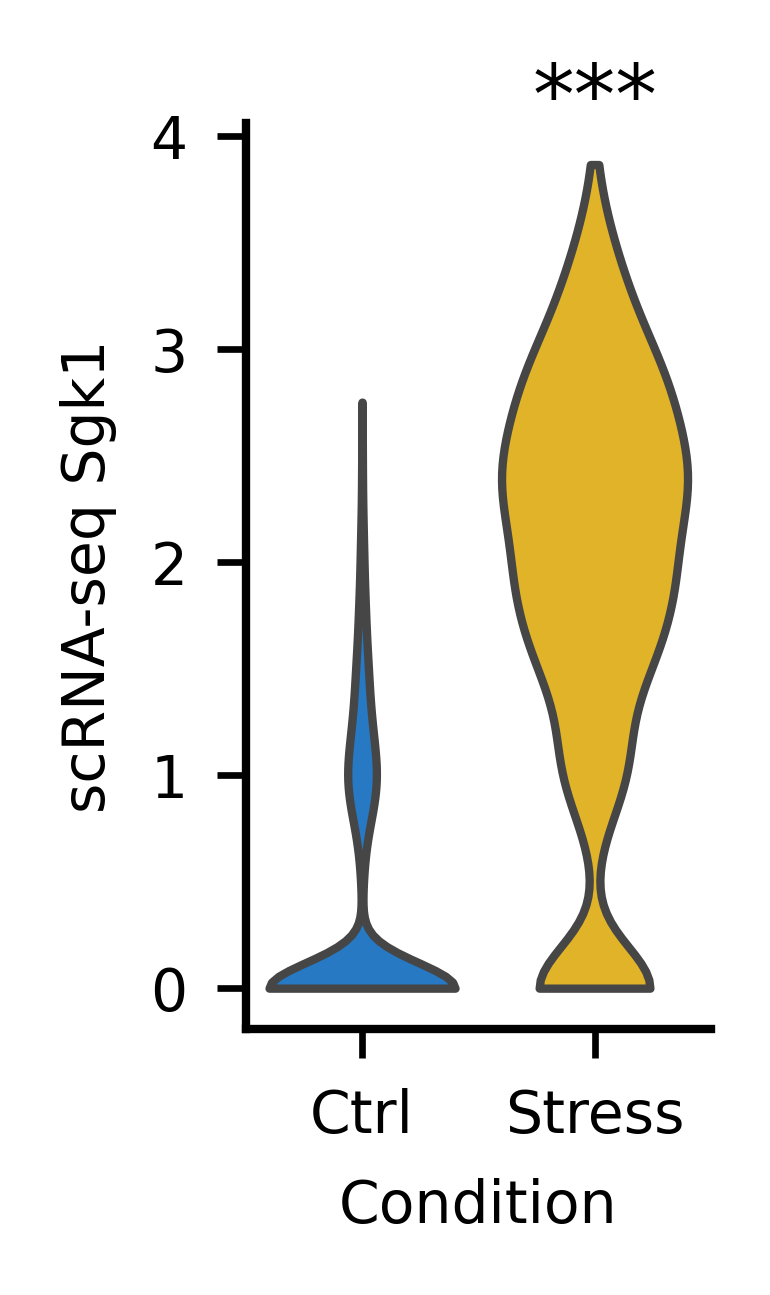

In [34]:
fig, ax = plt.subplots(1, 1, figsize=(1, 2)) 
sc.pl.violin(
    adata[adata.obs.louvain_coarse.str.contains("Oligo")], 
    groupby='condition', 
    keys='Sgk1',
    show=False,
    ax=ax,
    stripplot=False,
    scale='width',
    linewidth=1,
)
ax.set_ylabel('scRNA-seq Sgk1')
ax.set_xticklabels(['Ctrl', 'Stress'])
ax.set_xlabel('Condition')
x1, x2 = 0, 1 
#y, h, col = rnascope['Oligo']['Sgk1/Area'].max()+0.2, 0.2, 'k'
y = ax.get_ylim()[1]
#ax.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1, c=col)
ax.text(x2, 0.98*y, pval_to_asterisk(p), ha='center', va='bottom', color='k')
sns.despine()

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(1, 2)) 
sc.pl.violin(
    adata[adata.obs.louvain_coarse.str.contains("Oligo")], 
    groupby='condition', 
    keys='Cdkn1a',
    show=False,
    ax=ax,
    stripplot=False,
    scale='width',
    linewidth=0.5,
)
ax.set_ylabel('scRNA-seq Cdkn1a')
ax.set_xticklabels(['Ctrl', 'Stress'])
ax.set_xlabel('Condition')

sns.despine()

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(1, 2)) 
df = valid_data[
    (valid_data['Gene']=='Cdkn1a') 
    & (valid_data['Cell Type'].str.contains('Oligo')) 
    & (valid_data['Genotype']=='WT')
]
sns.barplot(
    x='Condition',
    y='Value',
    data=df,
    edgecolor='Black',
    linewidth=1,
    ax=ax,
    palette=adata.uns['condition_colors']
)
sns.swarmplot(
    x='Condition',
    y='Value',
    data=df,
    edgecolor='gray', 
    linewidth=1, 
    ax=ax,
    palette=adata.uns['condition_colors']
)
ax.set_ylabel('qPCR mRNA Cdkn1a')
x = df[df['Condition'] == 'Ctrl']['Value']
y = df[df['Condition'] == 'Stress']['Value']
_, p = sp.stats.ttest_ind(x, y)


x1, x2 = 0, 1 
y, h, col = df['Value'].max()+0.2, 0.2, 'k'
ax.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1, c=col)
ax.text((x1+x2)*.5, y+h, pval_to_asterisk(p), ha='center', va='bottom', color=col)


sns.despine()

In [ ]:
def paired_boxplot(group):
    fig, ax = plt.subplots(1, 2, figsize=(2, 2), sharey=True)
    df = rnascope[f'Resp18_{group}'][rnascope[f'Resp18_{group}']['Group'] == 'Low']
    var = 'Resp18/Area'
    sns.barplot(
        x='Condition', 
        y='Resp18/Area', 
        data=df, 
        ax=ax[0], 
        edgecolor='black', 
        linewidth=1,
        palette=adata.uns['condition_colors']
    )
    sns.swarmplot(
        x='Condition',
        y=var, 
        data=df,
        edgecolor='gray', 
        linewidth=1,
        palette=adata.uns['condition_colors'],
        ax=ax[0])

    x = df[df['Condition']=='Ctrl'][var]
    y = df[df['Condition']=='AD'][var]
    _, p = sp.stats.ttest_ind(x, y)


    x1, x2 = 0, 1 
    scale = df[var].max()
    y, h, col = scale + 0.15*scale, 0.15*scale, 'k'
    ax[0].plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1, c=col)
    ax[0].text((x1+x2)*.5, y+h, pval_to_asterisk(p), ha='center', va='bottom', color=col)

    df = rnascope[f'Resp18_{group}'][rnascope[f'Resp18_{group}']['Group'] == 'High']
    var = 'Resp18/Area'
    sns.barplot(
        x='Condition', 
        y='Resp18/Area', 
        data=df, 
        ax=ax[1], 
        edgecolor='black', 
        linewidth=1,
        palette=adata.uns['condition_colors']
    )
    sns.swarmplot(
        x='Condition',
        y=var, 
        data=df,
        edgecolor='gray', 
        linewidth=1,
        palette=adata.uns['condition_colors'],
        ax=ax[1])

    x = df[df['Condition']=='Ctrl'][var]
    y = df[df['Condition']=='AD'][var]
    _, p = sp.stats.ttest_ind(x, y)


    x1, x2 = 0, 1 
    scale = df[var].max()
    y, h, col = scale + 0.15*scale, 0.15*scale, 'k'
    ax[1].plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1, c=col)
    ax[1].text((x1+x2)*.5, y+h, pval_to_asterisk(p), ha='center', va='bottom', color=col)
    ax[1].set_ylabel('')
    fig.tight_layout()
    sns.despine()

In [ ]:
paired_boxplot('WT')
paired_boxplot('GrNex')
paired_boxplot('GrDlx')
paired_boxplot('MrNex')
paired_boxplot('MrDlx')

In [ ]:
gene_list = ['Resp18', 'Resp18', 'Resp18']
cell_type_list = ['CA1', 'CA3', 'DG']
cell_type_adata_list = ['CA1 Glut 2', 'CA3 Glut 2', 'DG Glut 2']

for i in range(len(gene_list)):
    fig, ax = plt.subplots(1, 2, figsize=(7, 3))
    de_genes_plot = de_genes[
        (de_genes['gene']==gene_list[i])
        & (de_genes['clust']==cell_type_adata_list[i])
    ]
    de_genes_plot = de_genes_plot[
        ~de_genes_plot['test'].isin(['WT_GR','WT_MR'])
    ]
    de_genes_plot['test'] = de_genes_plot['test'].astype('category')
    de_genes_plot['test'] = de_genes_plot['test'].cat.reorder_categories([
        'WT',
        'GR_Nex',
        'GR_Dlx',
        'MR_Nex',
        'MR_Dlx'
    ])
    pivot_mean_pert = de_genes_plot.pivot(columns='test', index='gene', values='mean_pert')
    pivot_mean_ctrl = de_genes_plot.pivot(columns='test', index='gene', values='mean_ctrl')
    pivot_qval = de_genes_plot.pivot(columns='test', index='gene', values='qval')
    pivot_log2fc = de_genes_plot.pivot(columns='test', index='gene', values='log2fc')
    qval_mask = (
        (pivot_qval < 0.05) 
        & ((pivot_mean_pert > 0.1) | (pivot_mean_ctrl > 0.1)) 
        & (np.abs(pivot_log2fc) > 0.1)
    )
    sns.heatmap(
        pivot_log2fc,
        annot=True,
        cmap='RdBu_r',
        center=0,
        ax=ax[0],
        mask=~qval_mask
    )
    ax[0].set_title(cell_type_adata_list[i])

    sns.barplot(
        x='Comb', 
        y='Value', 
        data=valid_data[
            (valid_data['Gene']==gene_list[i]) 
            & (valid_data['Cell Type']==cell_type_list[i]) 
            #& (valid_data['Genotype']=='WT')
        ],
        palette=adata.uns['condition_colors'],
        ax=ax[1],
        edgecolor='Black',
        linewidth=1,
    )
    sns.swarmplot(
        x='Comb', 
        y='Value', 
        data=valid_data[
            (valid_data['Gene']==gene_list[i]) 
            & (valid_data['Cell Type']==cell_type_list[i]) 
            #& (valid_data['Genotype']=='WT')
        ],
        size=6,
        palette=adata.uns['condition_colors'],
        alpha=0.8,
        edgecolor='gray',
        linewidth=1,
        ax=ax[1]
    )
    ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=90)
    ax[1].set_xlabel('')
    ax[1].set_ylabel('')
    ax[1].set_ylim(bottom=0)
    ax[1].set_title('qPCR')
    sns.despine()
    fig.tight_layout()
    fig.savefig(f'figs/log2fc_{cell_type_adata_list[i]}_{gene_list[i]}.png', dpi=300)

In [ ]:
import pickle
with open('./../../results/DE/de_stress_new/pickle/new_function.pickle', 'rb') as f:
    de_post_df = pickle.load(f)

In [ ]:
de_genes = pd.read_pickle('./../../results/DE/de_stress_new/pickle/genes.pickle')
de_genes_sign = de_genes[de_genes['qval']<0.05]
de_genes_sign_mean = de_genes_sign[(de_genes_sign['mean_pert']>0.1) | (de_genes_sign['mean_ctrl']>0.1)]
de_genes_sign_mean = de_genes_sign_mean[np.abs(de_genes_sign_mean['log2fc'])>0.1]

In [ ]:
ca1 = set(
    de_genes_sign_mean[
        (de_genes_sign_mean.clust=='CA1 Glut 1') 
        & (de_genes_sign_mean.test=='WT')
    ]['gene'].values
).intersection(set(
        de_genes_sign_mean[
        (de_genes_sign_mean.clust=='CA1 Glut 2') 
        & (de_genes_sign_mean.test=='WT')
    ]['gene'].values
))

In [ ]:
ca3 = set(
    de_genes_sign_mean[
        (de_genes_sign_mean.clust=='CA3 Glut 1') 
        & (de_genes_sign_mean.test=='WT')
    ]['gene'].values
).intersection(set(
        de_genes_sign_mean[
        (de_genes_sign_mean.clust=='CA3 Glut 2') 
        & (de_genes_sign_mean.test=='WT')
    ]['gene'].values
))

In [ ]:
len(ca1.intersection(ca3)) / len(ca1.union(ca3))

In [ ]:
len(ca1.intersection(ca3))

In [ ]:
plt.rcParams['axes.labelsize'] = 9
plt.rcParams['xtick.labelsize'] = 9
plt.rcParams['ytick.labelsize'] = 9
plt.rcParams['legend.fontsize'] = 9
plt.rcParams['axes.titlesize'] = 10
plt.rcParams['axes.linewidth'] = 1
plt.rcParams['figure.dpi'] = 400
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Helvetica']
plt.rcParams['savefig.transparent'] = True
plt.rcParams['axes.facecolor'] = (1,1,1,0)

In [ ]:
tests = ['WT']
fig, ax = plt.subplots(
    1,
    len(tests),
    figsize=(4.5*len(tests), 4),
    sharey=True
)


for i, test in enumerate(tests):
    df_sign_test = de_genes_sign_mean[de_genes_sign_mean['test'] == test]
    df_sign_test['clust'] = df_sign_test['clust'].astype('category')
    df_sign_test['clust'] = df_sign_test.clust.cat.reorder_categories(
        adata.obs.louvain_coarse.cat.categories[adata.obs.louvain_coarse.cat.categories.isin(df_sign_test.clust.unique())]
    )
    up = df_sign_test[df_sign_test['log2fc']>0].groupby('clust').size()
    down = df_sign_test[df_sign_test['log2fc']<0].groupby('clust').size()
    
    sns.barplot(up.index, up.values, palette=adata.uns['de_colors_up'], ax=ax)
    sns.barplot(down.index, -down.values, palette=adata.uns['de_colors_down'], ax=ax)
    ax.set_yticklabels([str(int(abs(x))) for x in ax.get_yticks()])
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90, fontsize=12)
    ax.set_title(test)
    labels = [x.get_text() for x in ax.get_xticklabels()]
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['left'].set_position(('outward', 5))
    ax.spines['bottom'].set_position(('outward', 5))
    ax.set_xticklabels(labels, rotation=90)
    ax.set_title(test)
    ax.set_ylim([-1300, 1300])
ax.axhline(0, linestyle='--', linewidth=0.5, color='black')
ax.axvline(13.5, linestyle='--', linewidth=0.5, color='black')
ax.axvline(22.5, linestyle='--', linewidth=0.5, color='black')
ax.text(-0.5, 1200, 'Neurons', fontsize=8)
ax.text(13.7, 1200, 'Glia', fontsize=8)
ax.text(22.7, 1200, 'Vascular', fontsize=8)
sns.despine()
ax.set_xlabel('')
ax.set_ylabel('DEGs')
ax.set_title('')
fig.tight_layout(rect=[0, 0.03, 1, 0.95])

In [29]:
de_genes_sign_mean[(de_genes_sign_mean['test']=='WT')].groupby('clust').size()

clust
Astro 1                1769
Astro 2                 448
CA1 Glut 1              525
CA1 Glut 2             1911
CA1 Glut 3              182
CA2 Glut                 59
CA3 Glut 1              498
CA3 Glut 2             1219
CA3 Glut 3              433
COPs                    117
Cajal-Retzius           147
DG Glut 1               409
DG Glut 2              1517
Endothelial            1579
Ependymal               242
GABA                    201
Granule Neuroblasts     138
MFOLs                   366
Macrophages 1           135
Macrophages 2             8
Meningeal               141
Microglia               927
Mossy Glut              179
NPCs                    149
OPCs                    369
Oligodendrocytes       1989
Pericytes               383
Vascular                176
dtype: int64

In [30]:
de_genes_sign_mean[(de_genes_sign_mean['test']=='WT') & (de_genes_sign_mean['clust'].str.contains('Oligo'))].set_index('gene').loc['Cdkn1a']

pval                      0.0
qval                      0.0
log2fc                5.93038
mean                 1.008977
zero_mean               False
grad                 0.000001
coef_mle              5.93038
coef_sd              0.247119
ll                -6060.87175
mean_pert             1.19726
mean_ctrl            0.006922
test                       WT
clust        Oligodendrocytes
Name: Cdkn1a, dtype: object

In [31]:
de_genes_sign_mean[
    (de_genes_sign_mean['test']=='WT') 
    & (de_genes_sign_mean['clust'].str.contains('Oligo'))
].set_index('gene').loc['Sgk1']

pval                      0.0
qval                      0.0
log2fc               2.436451
mean                 2.333279
zero_mean               False
grad                      0.0
coef_mle             2.436451
coef_sd              0.035724
ll              -10230.871023
mean_pert            1.914201
mean_ctrl            0.355873
test                       WT
clust        Oligodendrocytes
Name: Sgk1, dtype: object

In [32]:
rnascope['Oligo'].groupby('Condition').mean()

ID  Sgk1/Area
Condition                
Ctrl       3.5   0.135974
Stress     9.5   1.228397

In [33]:
1.23 / 0.13

9.461538461538462

In [34]:
de_genes_sign_mean[de_genes_sign_mean['clust']=='CA3 Glut 1'].set_index('gene').loc['Resp18']

pval            0.000333
qval            0.001762
log2fc          -0.35153
mean             1.10289
zero_mean          False
grad                 0.0
coef_mle        -0.35153
coef_sd         0.097973
ll          -1184.259892
mean_pert        0.24506
mean_ctrl       0.314474
test              GR_Nex
clust         CA3 Glut 1
Name: Resp18, dtype: object

In [35]:
de_genes_sign_mean[de_genes_sign_mean['clust']=='Oligodendrocytes'].set_index('gene').loc['Cdkn1a']

pval  qval    log2fc      mean  zero_mean          grad  coef_mle  \
gene                                                                        
Cdkn1a   0.0   0.0  5.930380  1.008977      False  1.022830e-06  5.930380   
Cdkn1a   0.0   0.0  3.555008  1.168119      False  1.338744e-07  3.555008   
Cdkn1a   0.0   0.0  5.646740  0.826714      False  2.559832e-09  5.646740   
Cdkn1a   0.0   0.0  5.268436  1.639427      False  1.553452e-08  5.268436   
Cdkn1a   0.0   0.0  6.122088  1.166971      False  7.444071e-08  6.122088   
Cdkn1a   0.0   0.0  4.209448  0.573888      False  8.225887e-08  4.209448   
Cdkn1a   0.0   0.0  5.330748  1.110022      False  2.747529e-08  5.330748   

         coef_sd           ll  mean_pert  mean_ctrl    test             clust  
gene                                                                           
Cdkn1a  0.247119 -6060.871750   1.197260   0.006922      WT  Oligodendrocytes  
Cdkn1a  0.183224 -2400.674158   0.905211   0.012588  MR_Dlx  Oligodendrocytes  
Cdkn1a  0.374828 -2533.444340   0.891425  -0.001454   WT_MR  Oligodendrocytes  
Cdkn1a  0.207304 -2163.607014   1.370757   0.017488  GR_Nex  Oligodendrocytes  
Cdkn1a  0.316600 -3283.522251   1.472582   0.013876   WT_GR  Oligodendrocytes  
Cdkn1a  0.299171 -2381.317242   0.639600   0.013137  GR_Dlx  Oligodendrocytes  
Cdkn1a  0.519512 -2733.104283   0.781538   0.003759  MR_Nex  Oligodendrocytes

In [42]:
for test in ['WT', 'GR_Nex', 'GR_Dlx', 'MR_Nex', 'MR_Dlx']:
    print(test)
    de_tmp = de_genes[de_genes['test']==test][['clust', 'qval', 'log2fc', 'mean_pert', 'mean_ctrl']]
    de_tmp = de_tmp[de_tmp['qval']<0.05]
    de_tmp.to_excel(f'de_genes_{test}.xlsx')

WT
GR_Nex
GR_Dlx
MR_Nex
MR_Dlx
